### Análisis de los datos

In [30]:
# %% load the data and get a summary.

maraton_data <- read.csv("results2005.csv")
head(maraton_data)

summary(maraton_data)

,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Hailu Negussie,25,M,Showa,00:05:01,2:11:45,1,1,1,7905,Hailu,Negussie
2,Wilson Onsare,28,M,Nairobi,00:05:02,2:12:21,2,2,2,7941,Wilson,Onsare
3,Benson Cherono,20,M,Baringo,00:05:03,2:12:48,3,3,1,7968,Benson,Cherono
4,Alan Culpepper,32,M,Lafayette,00:05:05,2:13:39,4,4,1,8019,Alan,Culpepper
5,Robert Kipkoech Cheruiyot,26,M,Nandi District,00:05:07,2:14:30,5,5,3,8070,Robert Kipkoech,Cheruiyot
6,Timothy Cherigat,28,M,,00:05:09,2:15:19,6,6,4,8119,Timothy,Cherigat


 display_name            age           gender           residence        
 Length:17528       Min.   :18.00   Length:17528       Length:17528      
 Class :character   1st Qu.:33.00   Class :character   Class :character  
 Mode  :character   Median :41.00   Mode  :character   Mode  :character  
                    Mean   :40.55                                        
                    3rd Qu.:48.00                                        
                    Max.   :83.00                                        
     pace           official_time         overall      gender_result  
 Length:17528       Length:17528       Min.   :    1   Min.   :    1  
 Class :character   Class :character   1st Qu.: 4376   1st Qu.: 2189  
 Mode  :character   Mode  :character   Median : 8764   Median : 4381  
                                       Mean   : 8763   Mean   : 4638  
                                       3rd Qu.:13146   3rd Qu.: 6572  
                                       Max.   :17528   M

In [31]:
options(repr.plot.width=16, repr.plot.height=16)

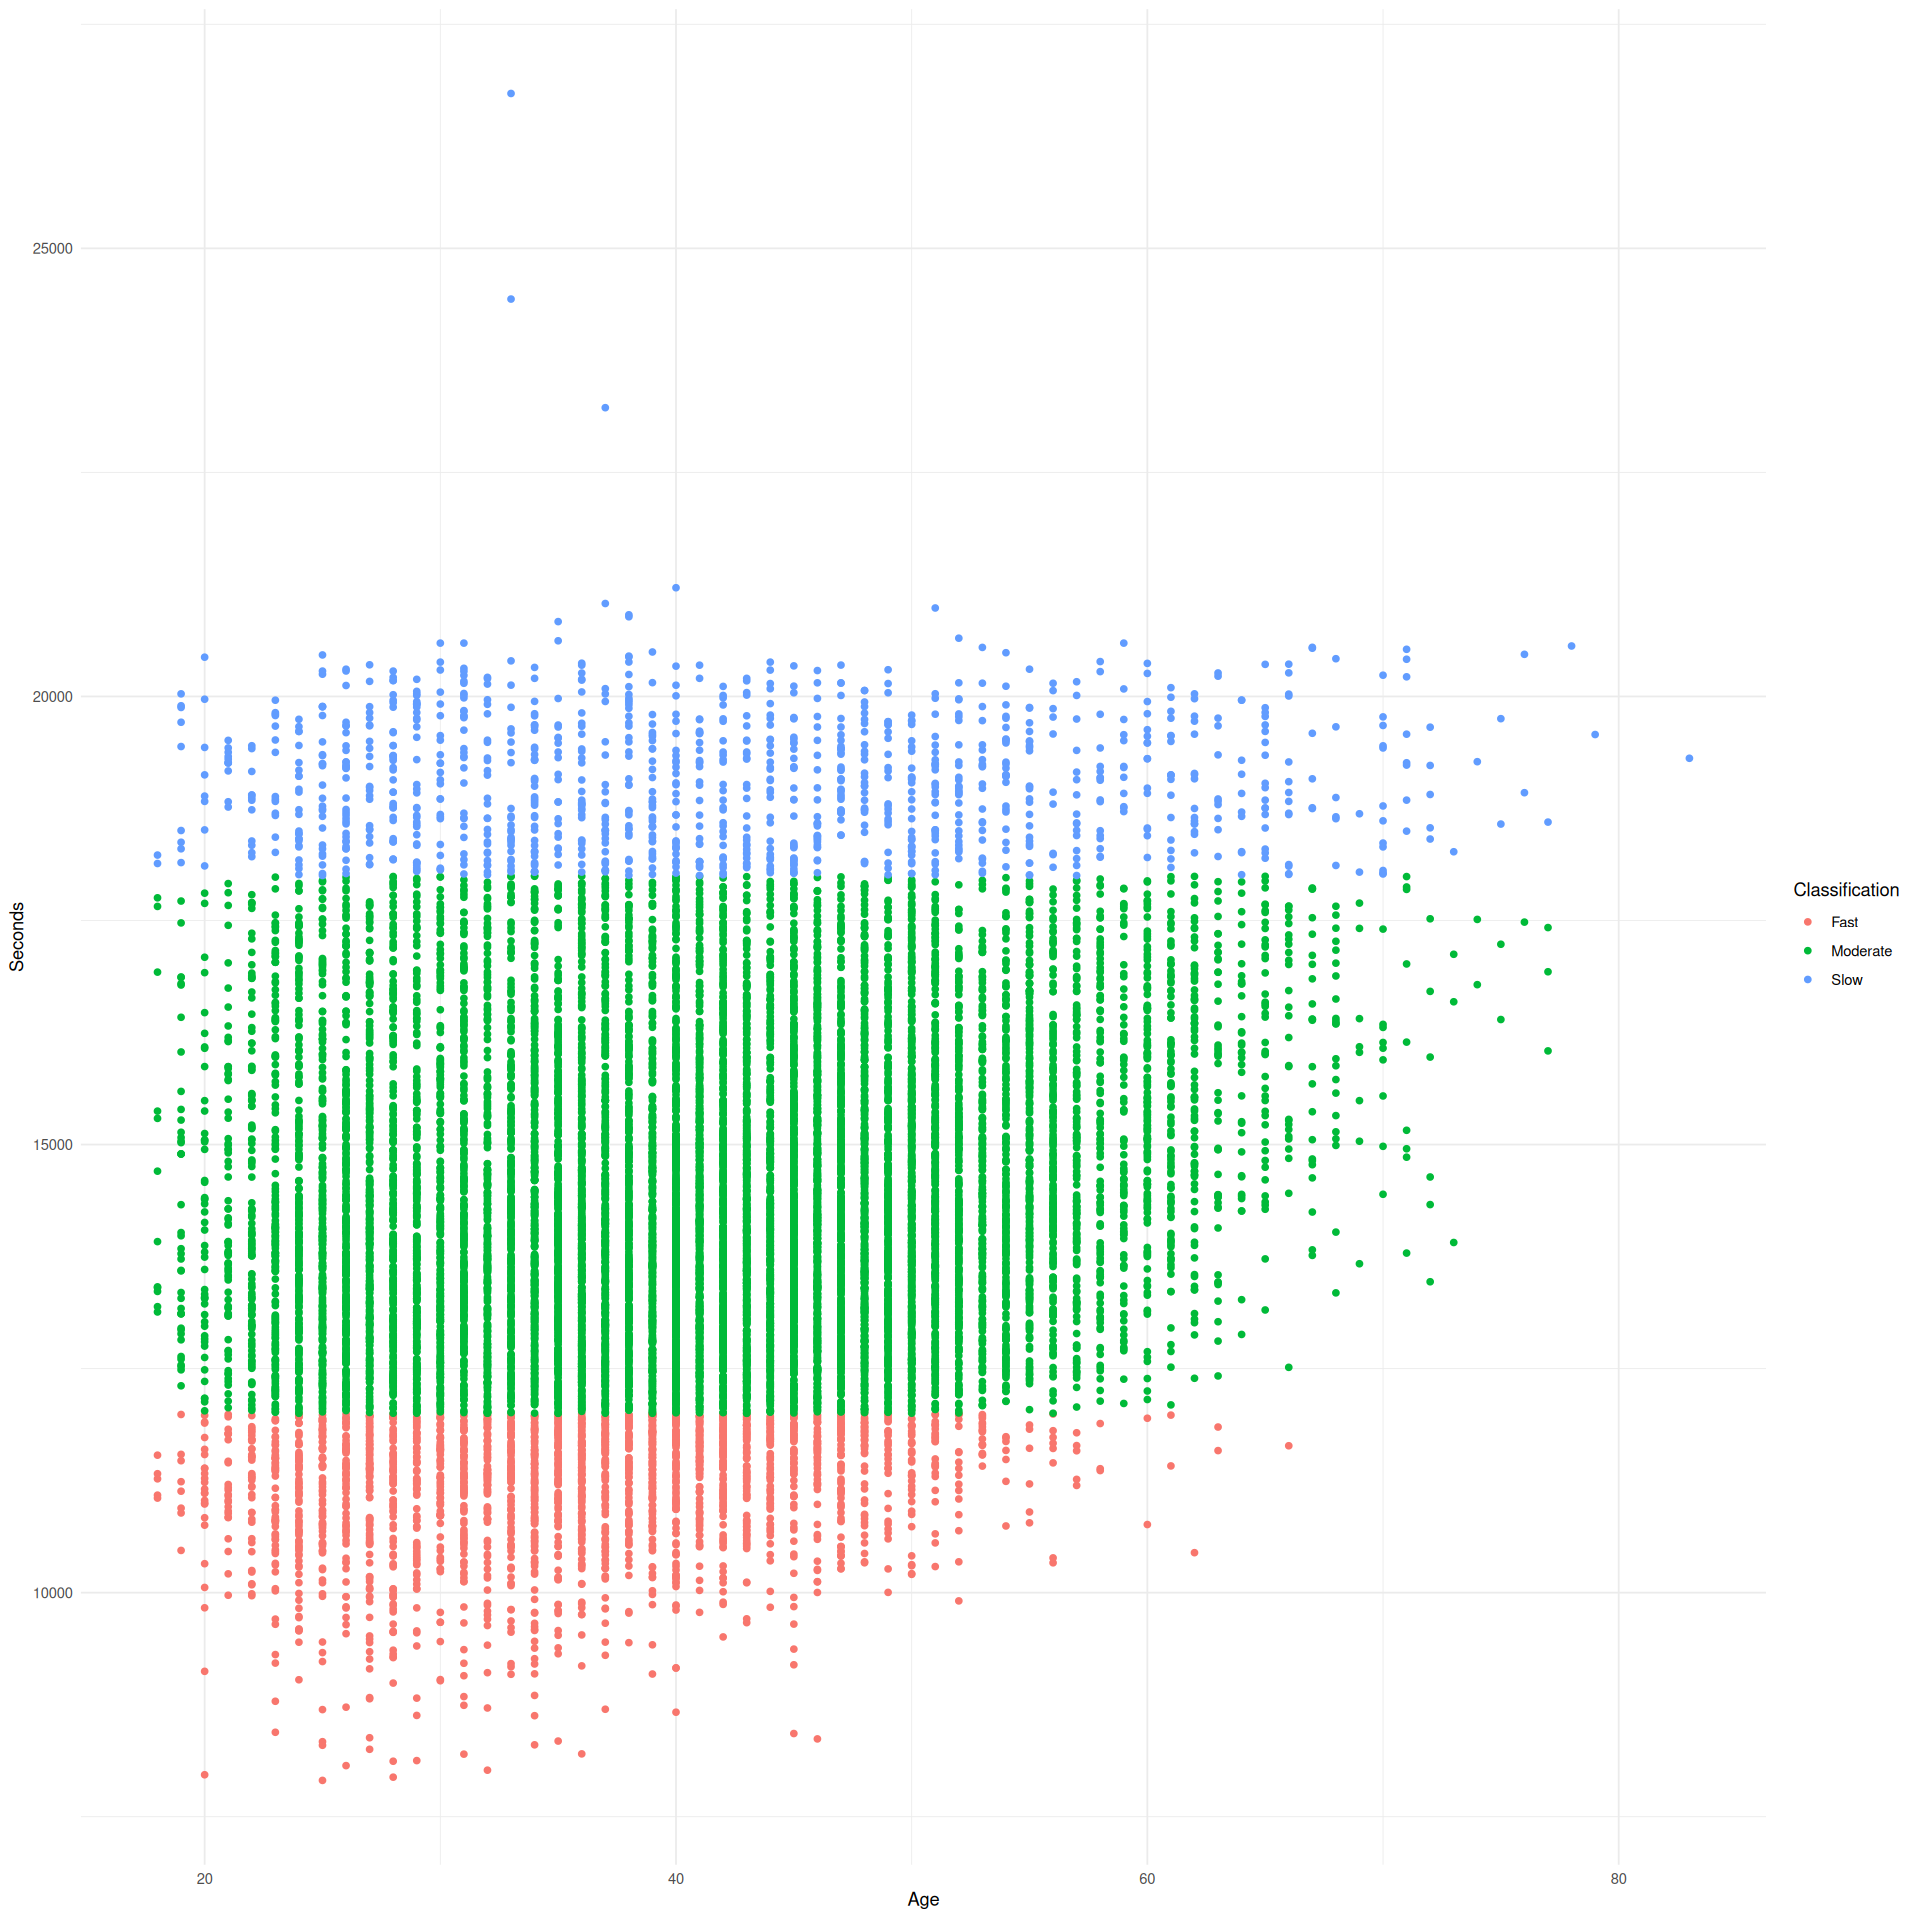

In [32]:
# Define the classification criteria
classificationSpeed <- cut(
  maraton_data$seconds,
  breaks = c(0, 12000, 18000, Inf),
  labels = c("Fast", "Moderate", "Slow")
)

# Add the classification as a new column in the dataframe
maraton_data$ClassificationSpeed <- classificationSpeed

library(ggplot2)

# Plot scatter plot with color determined by Classification
ggplot(maraton_data, aes(x = age, y = seconds, color = ClassificationSpeed)) +
  geom_point() +
  labs(x = "Age", y = "Seconds", color = "Classification") +
  theme_minimal()



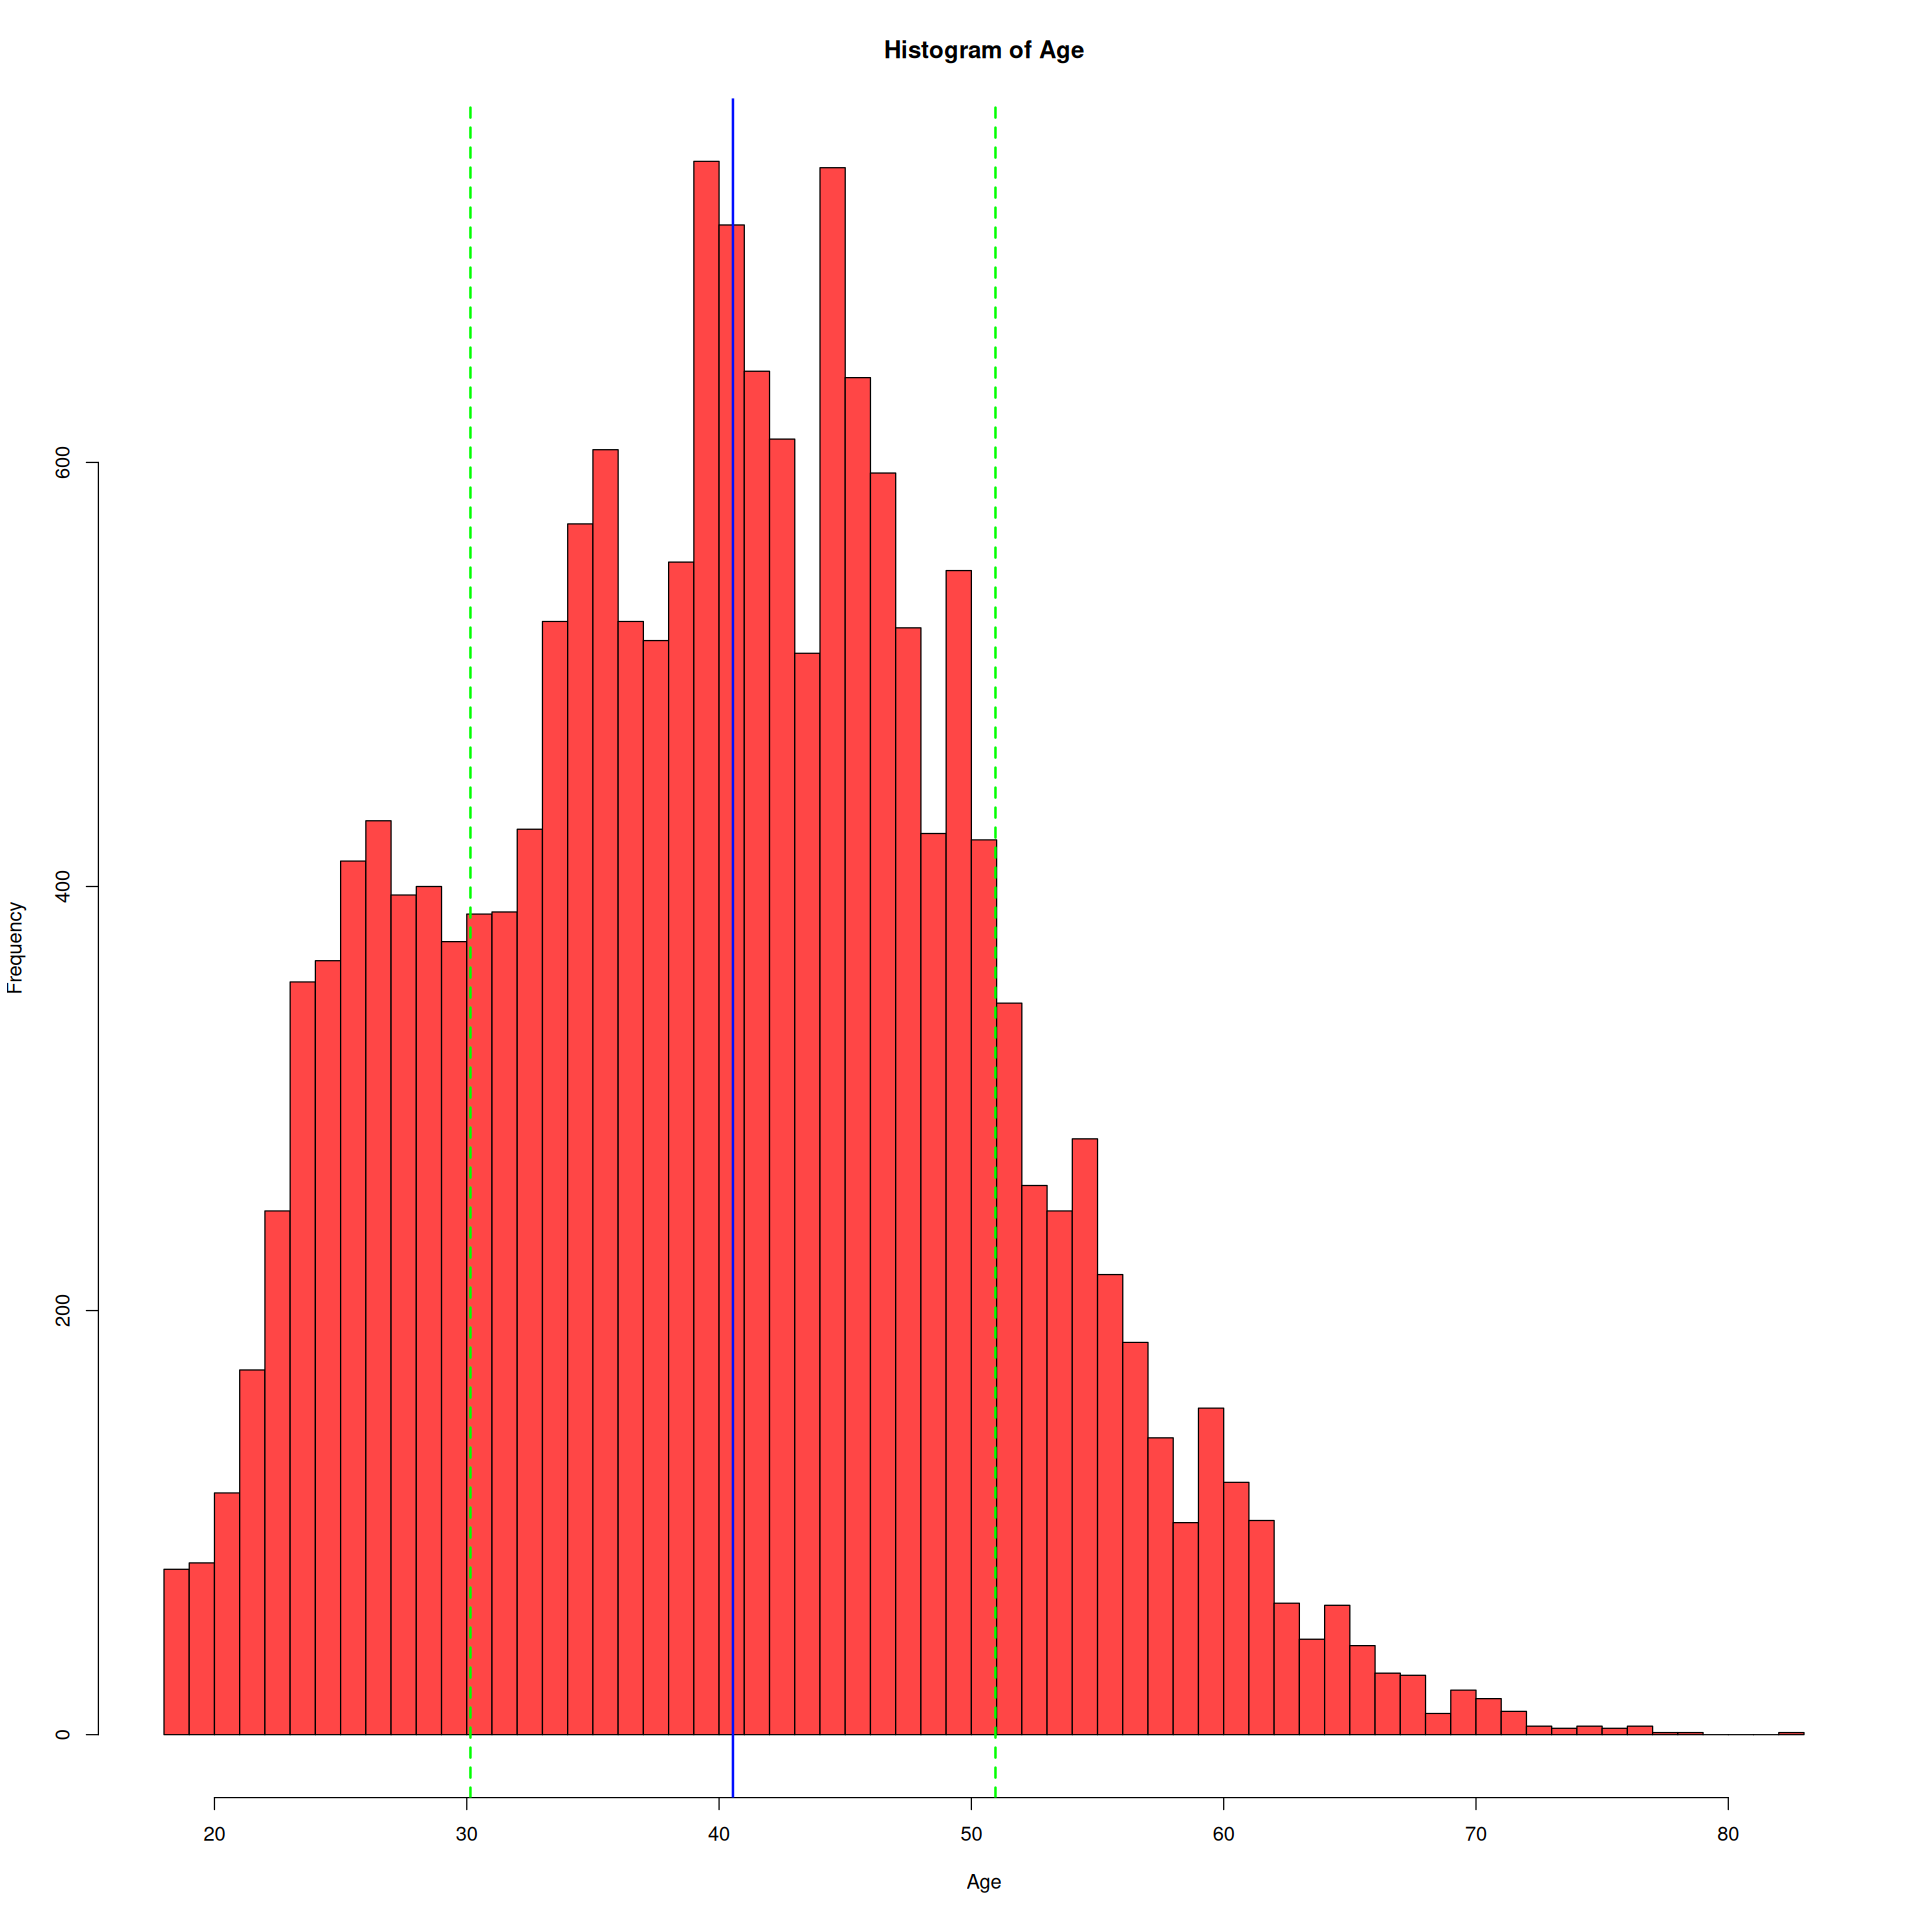

In [33]:
# Calculate mean and standard deviation
mean_age <- mean(maraton_data$age)
sd_age <- sd(maraton_data$age)

# Now plot the histogram
hist(
    maraton_data$age,
    breaks = 50, 
    col = "#ff4646", 
    xlab = "Age", 
    main = "Histogram of Age"
)

# Add mean line
abline(v = mean_age, col = "#000dff", lwd = 2)

# Add standard deviation lines
abline(v = mean_age + sd_age, col = "green", lwd = 2, lty = 2)
abline(v = mean_age - sd_age, col = "green", lwd = 2, lty = 2)

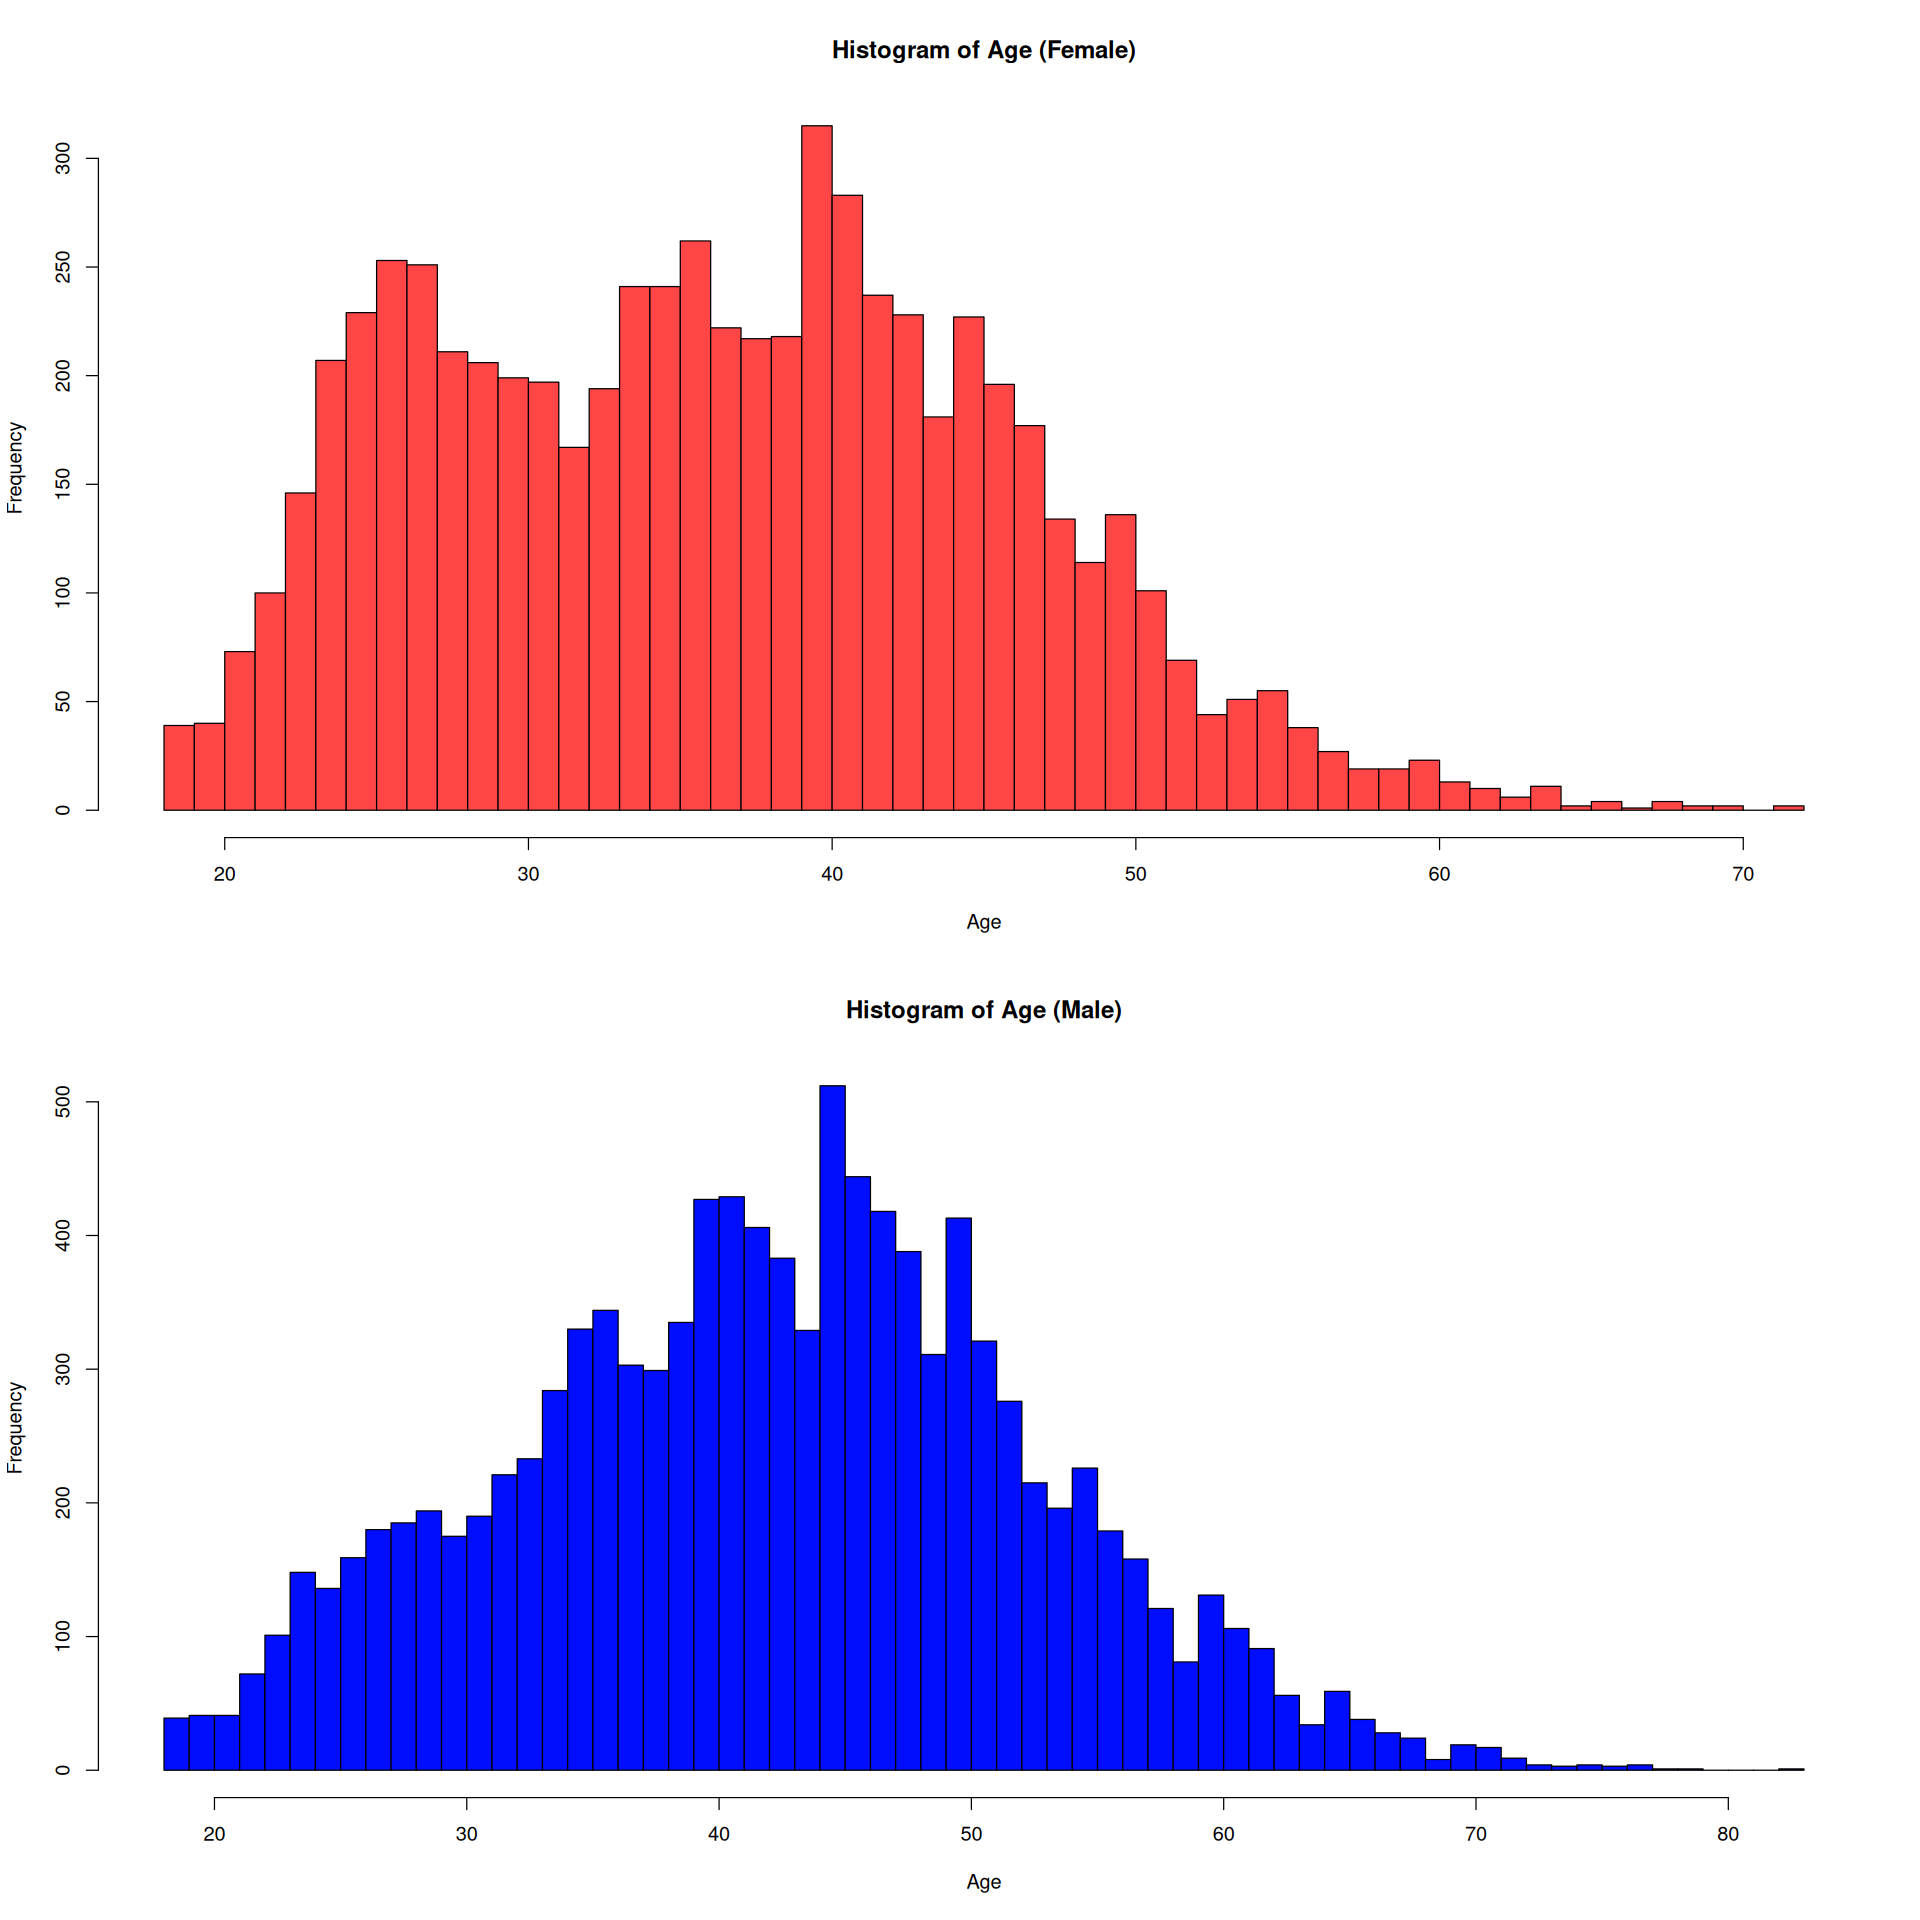

In [34]:
# Split the data frame by gender
gender_data <- split(maraton_data, maraton_data$gender)

# Create separate histograms for each gender
par(mfrow = c(2, 1))  # Set the layout to 2 rows and 1 column

# Histogram for females
hist(
  gender_data$F$age,
  breaks = 50,
  col = "#ff4646",
  xlab = "Age",
  main = "Histogram of Age (Female)"
)

# Histogram for males
hist(
  gender_data$M$age,
  breaks = 50,
  col = "#000dff",
  xlab = "Age",
  main = "Histogram of Age (Male)"
)


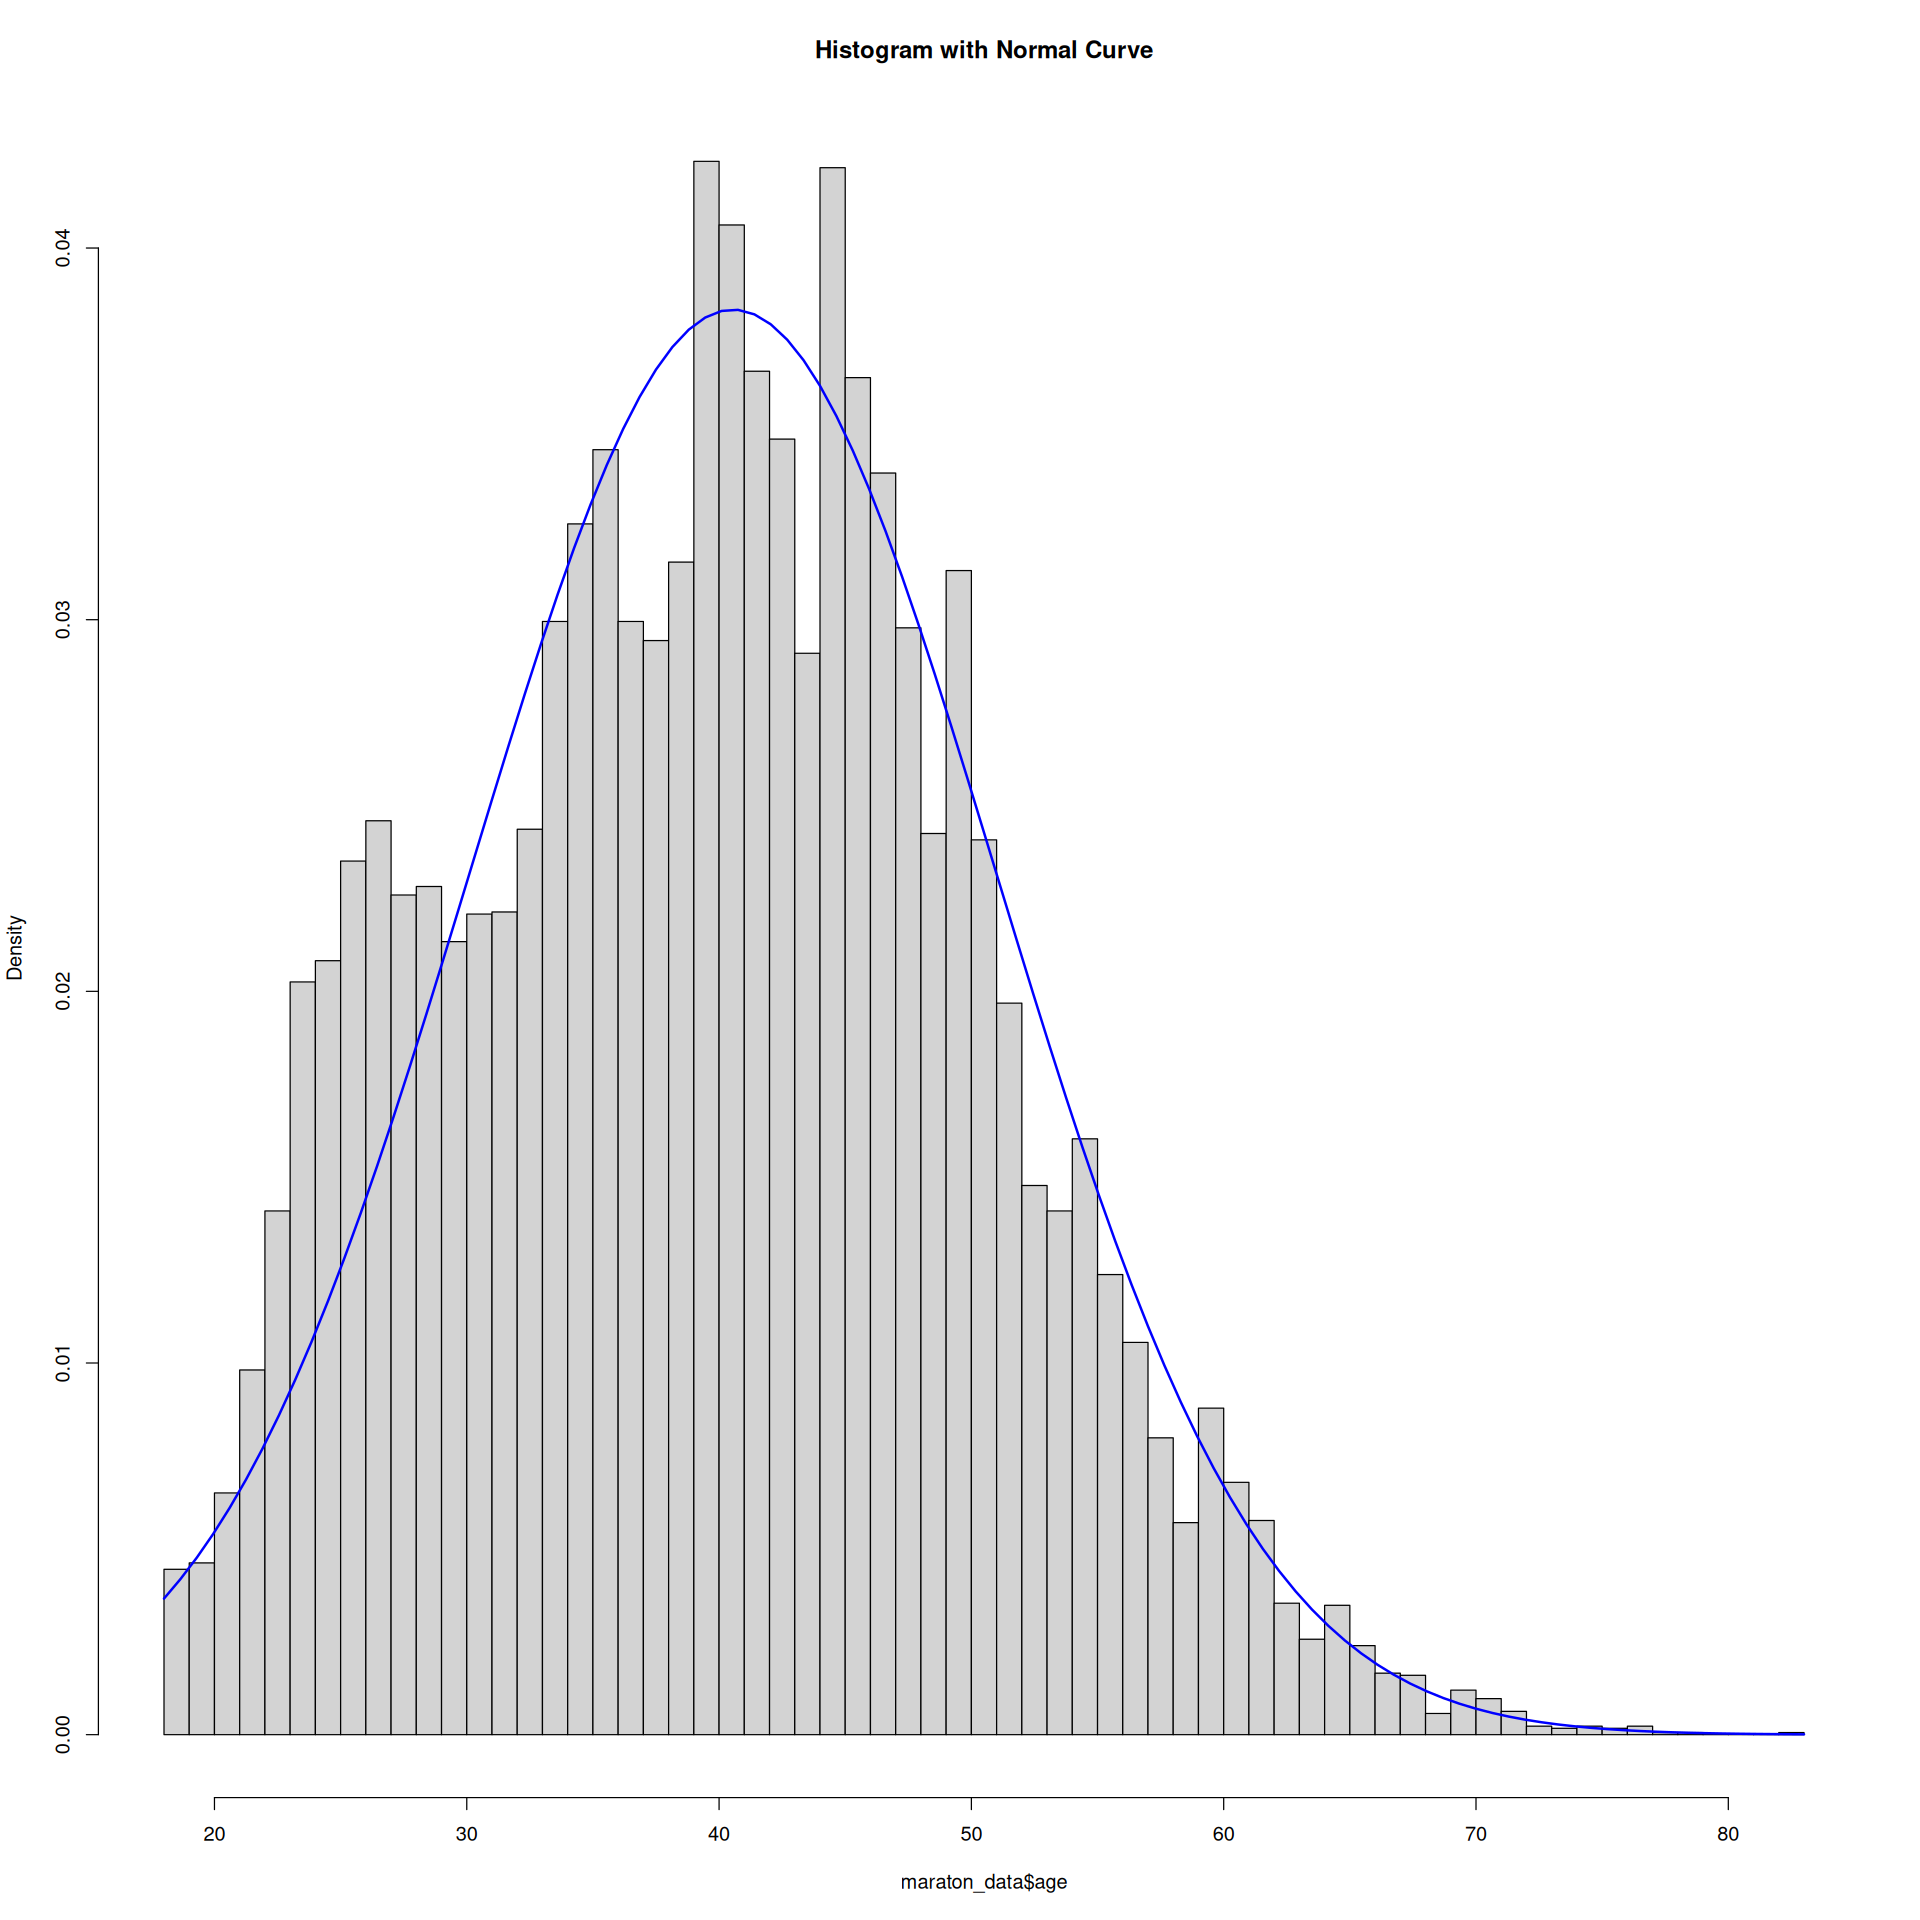

In [36]:
# plot a normal distribution curve in the histogram of ages to see if it fits
hist(
      maraton_data$age,
      breaks = 50, 
      freq = FALSE, 
      main = "Histogram with Normal Curve"
)
curve(dnorm(x, mean = mean(maraton_data$age), sd = sd(maraton_data$age)), 
      add = TRUE, col = "blue", lwd = 2)

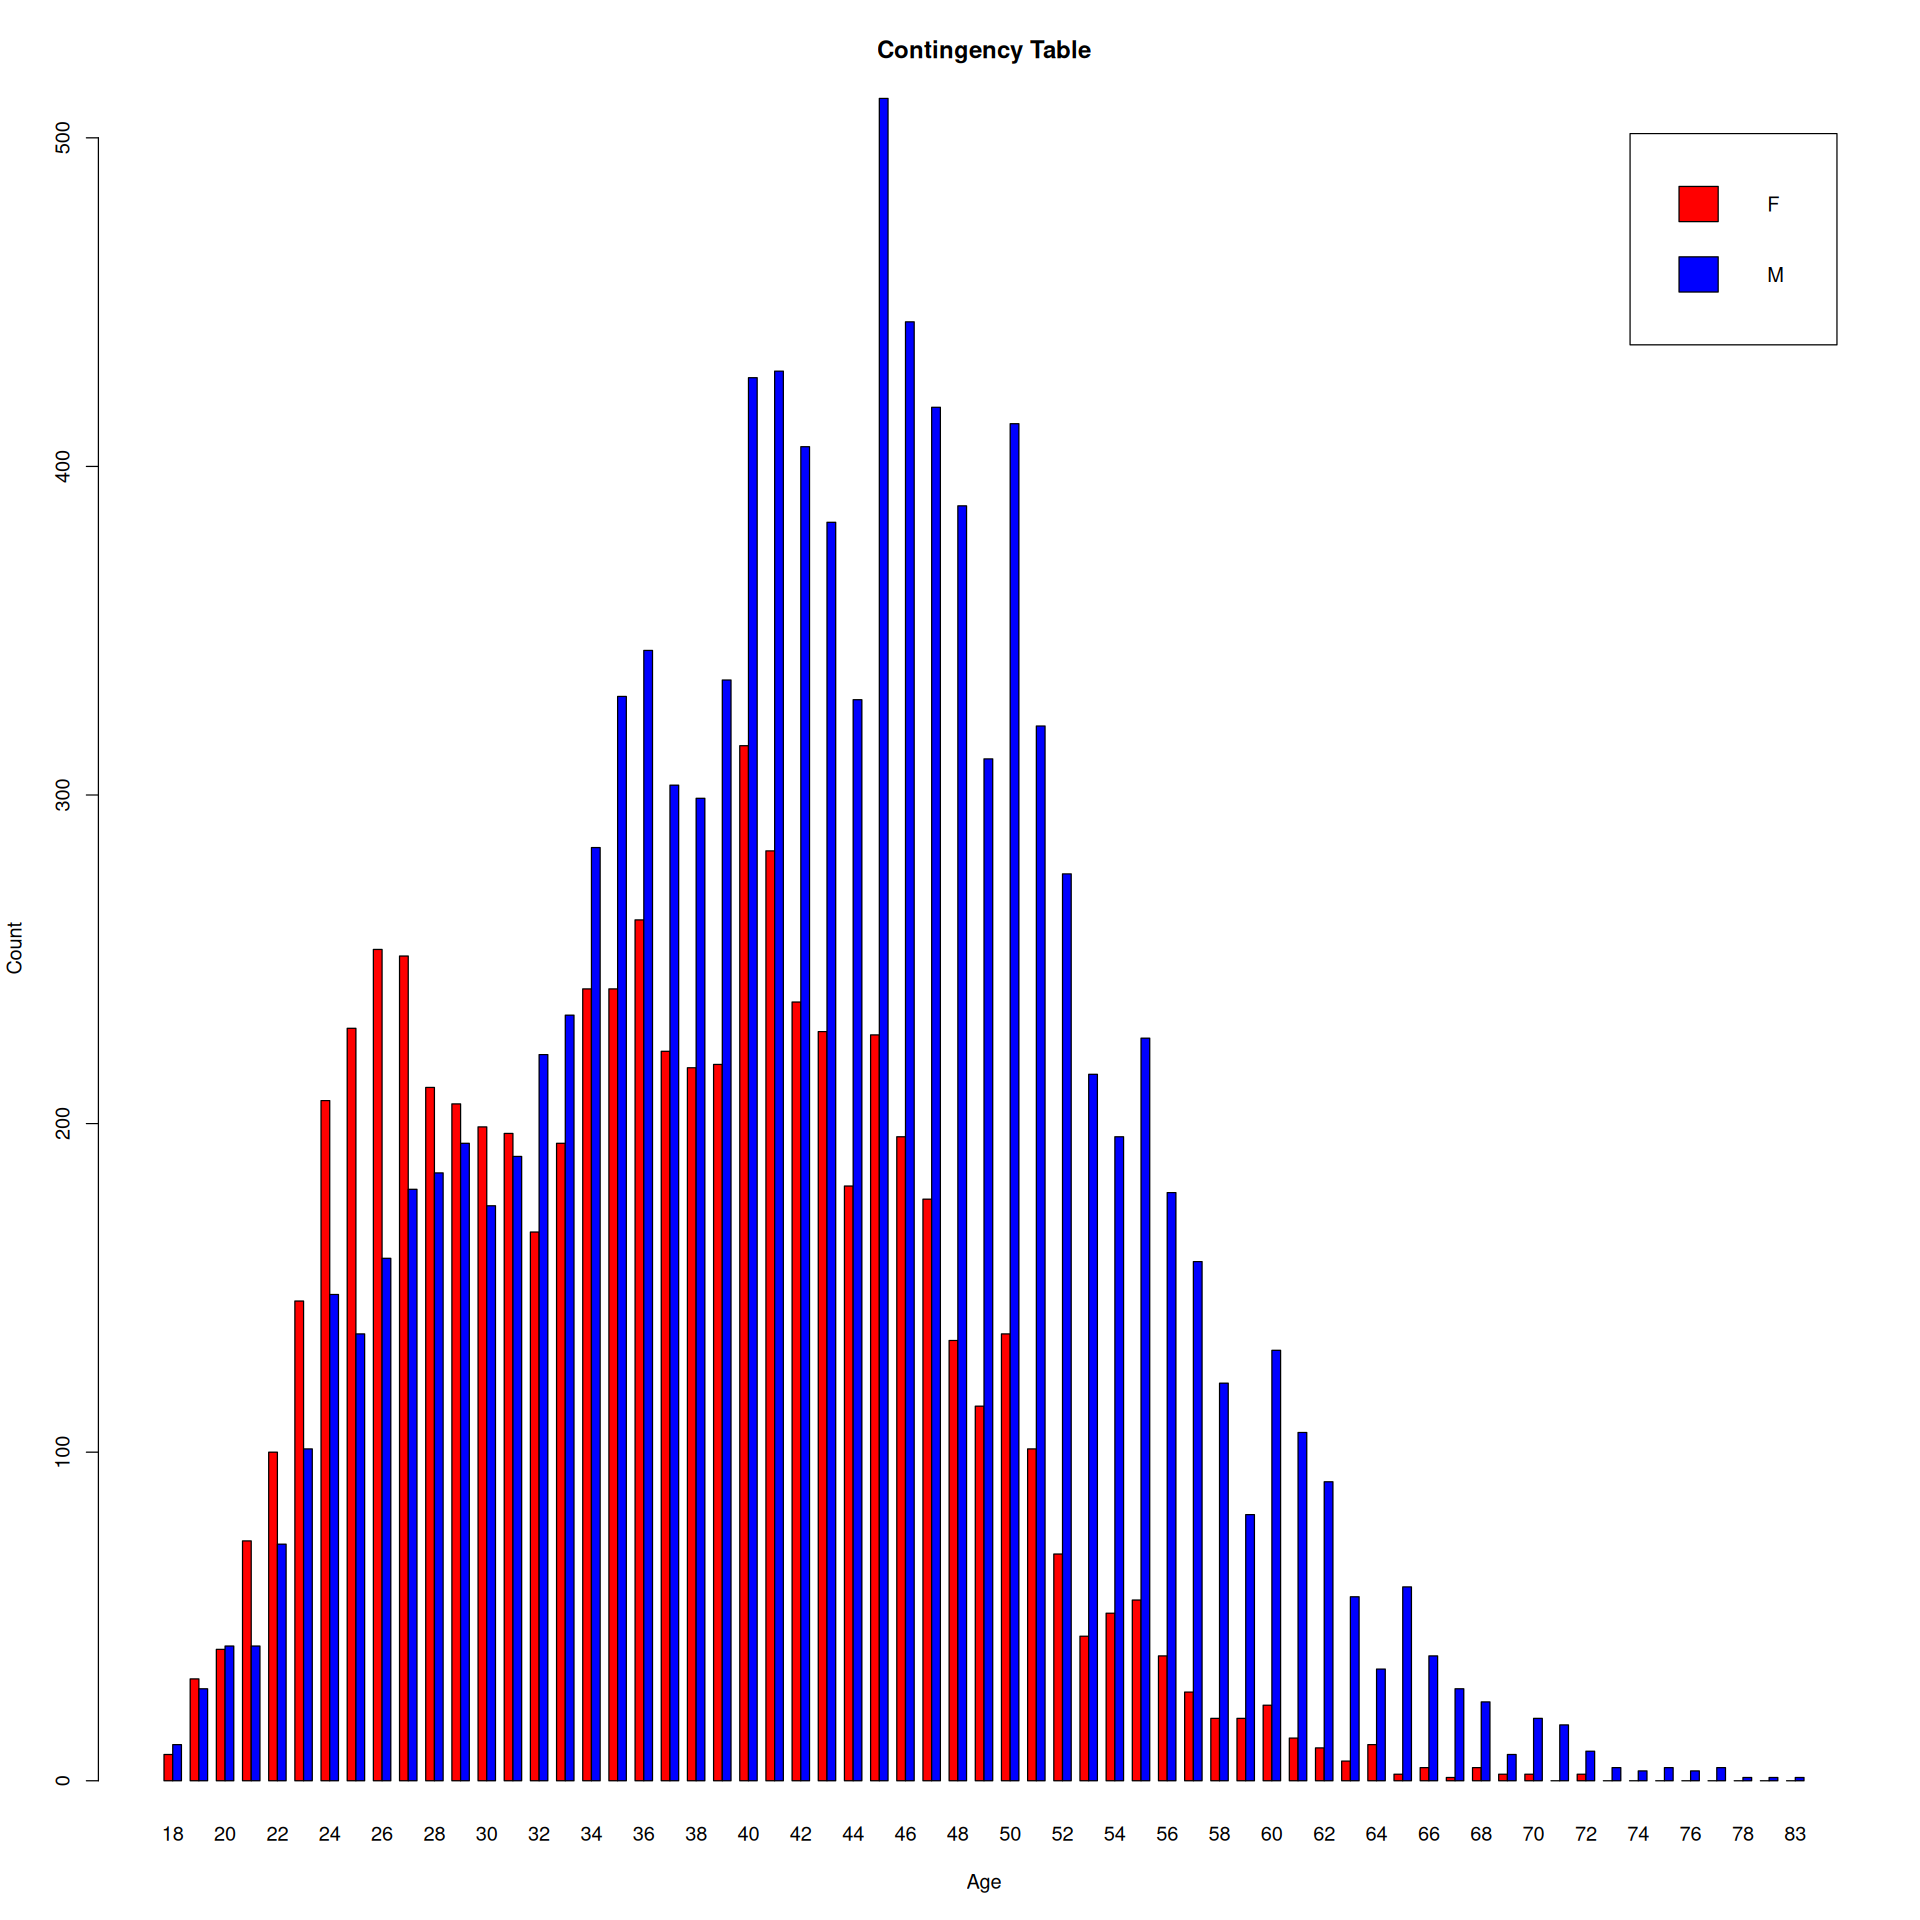

In [38]:
# Create a contingency table
contingency_table <- table(maraton_data$gender, maraton_data$age)
barplot(
    contingency_table,
    beside = TRUE, 
    legend = TRUE, 
    xlab = "Age", 
    ylab = "Count", 
    main = "Contingency Table", 
    col = c("red", "blue")
)


In [37]:
# Test for Normality

# take 5000 random persons from the data

set.seed(324)

sample_data <- maraton_data[sample(nrow(maraton_data), 100),]
shapiro.test(sample_data$age)



	Shapiro-Wilk normality test

data:  sample_data$age
W = 0.98149, p-value = 0.1735


In [42]:
# Define the age groups
age_groups <- cut(
    maraton_data$age,
    breaks = c(0, 20, 30, 40, 50, Inf), 
    labels = c("0-20", "21-30", "31-40", "41-50", "51+")
)

# Add the age groups as a new column in the dataframe
maraton_data$AgeGroup <- age_groups

head(maraton_data)


,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name,ClassificationSpeed,AgeGroup
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<fct>,<fct>
1,Hailu Negussie,25,M,Showa,00:05:01,2:11:45,1,1,1,7905,Hailu,Negussie,Fast,21-30
2,Wilson Onsare,28,M,Nairobi,00:05:02,2:12:21,2,2,2,7941,Wilson,Onsare,Fast,21-30
3,Benson Cherono,20,M,Baringo,00:05:03,2:12:48,3,3,1,7968,Benson,Cherono,Fast,0-20
4,Alan Culpepper,32,M,Lafayette,00:05:05,2:13:39,4,4,1,8019,Alan,Culpepper,Fast,31-40
5,Robert Kipkoech Cheruiyot,26,M,Nandi District,00:05:07,2:14:30,5,5,3,8070,Robert Kipkoech,Cheruiyot,Fast,21-30
6,Timothy Cherigat,28,M,,00:05:09,2:15:19,6,6,4,8119,Timothy,Cherigat,Fast,21-30


Hay cuatro escenarios:

    - H0 es verdad, H0 no es rechazada
    - H0 es verdad, H0 es rechazada
    - H0 no es verdad, H0 no es rechazada
    - H0 no es verdad, H0 es rechazada

El p-value representa la probabilidad, asumiendo la hipótesis, de obtener un resultado tan extremo como el dado, entonces si se obtiene un p-value menor que el coeficiente de confianza prefijado, se rechaza la hipótesis, en otro caso se falla a rechazar la hipótesis.

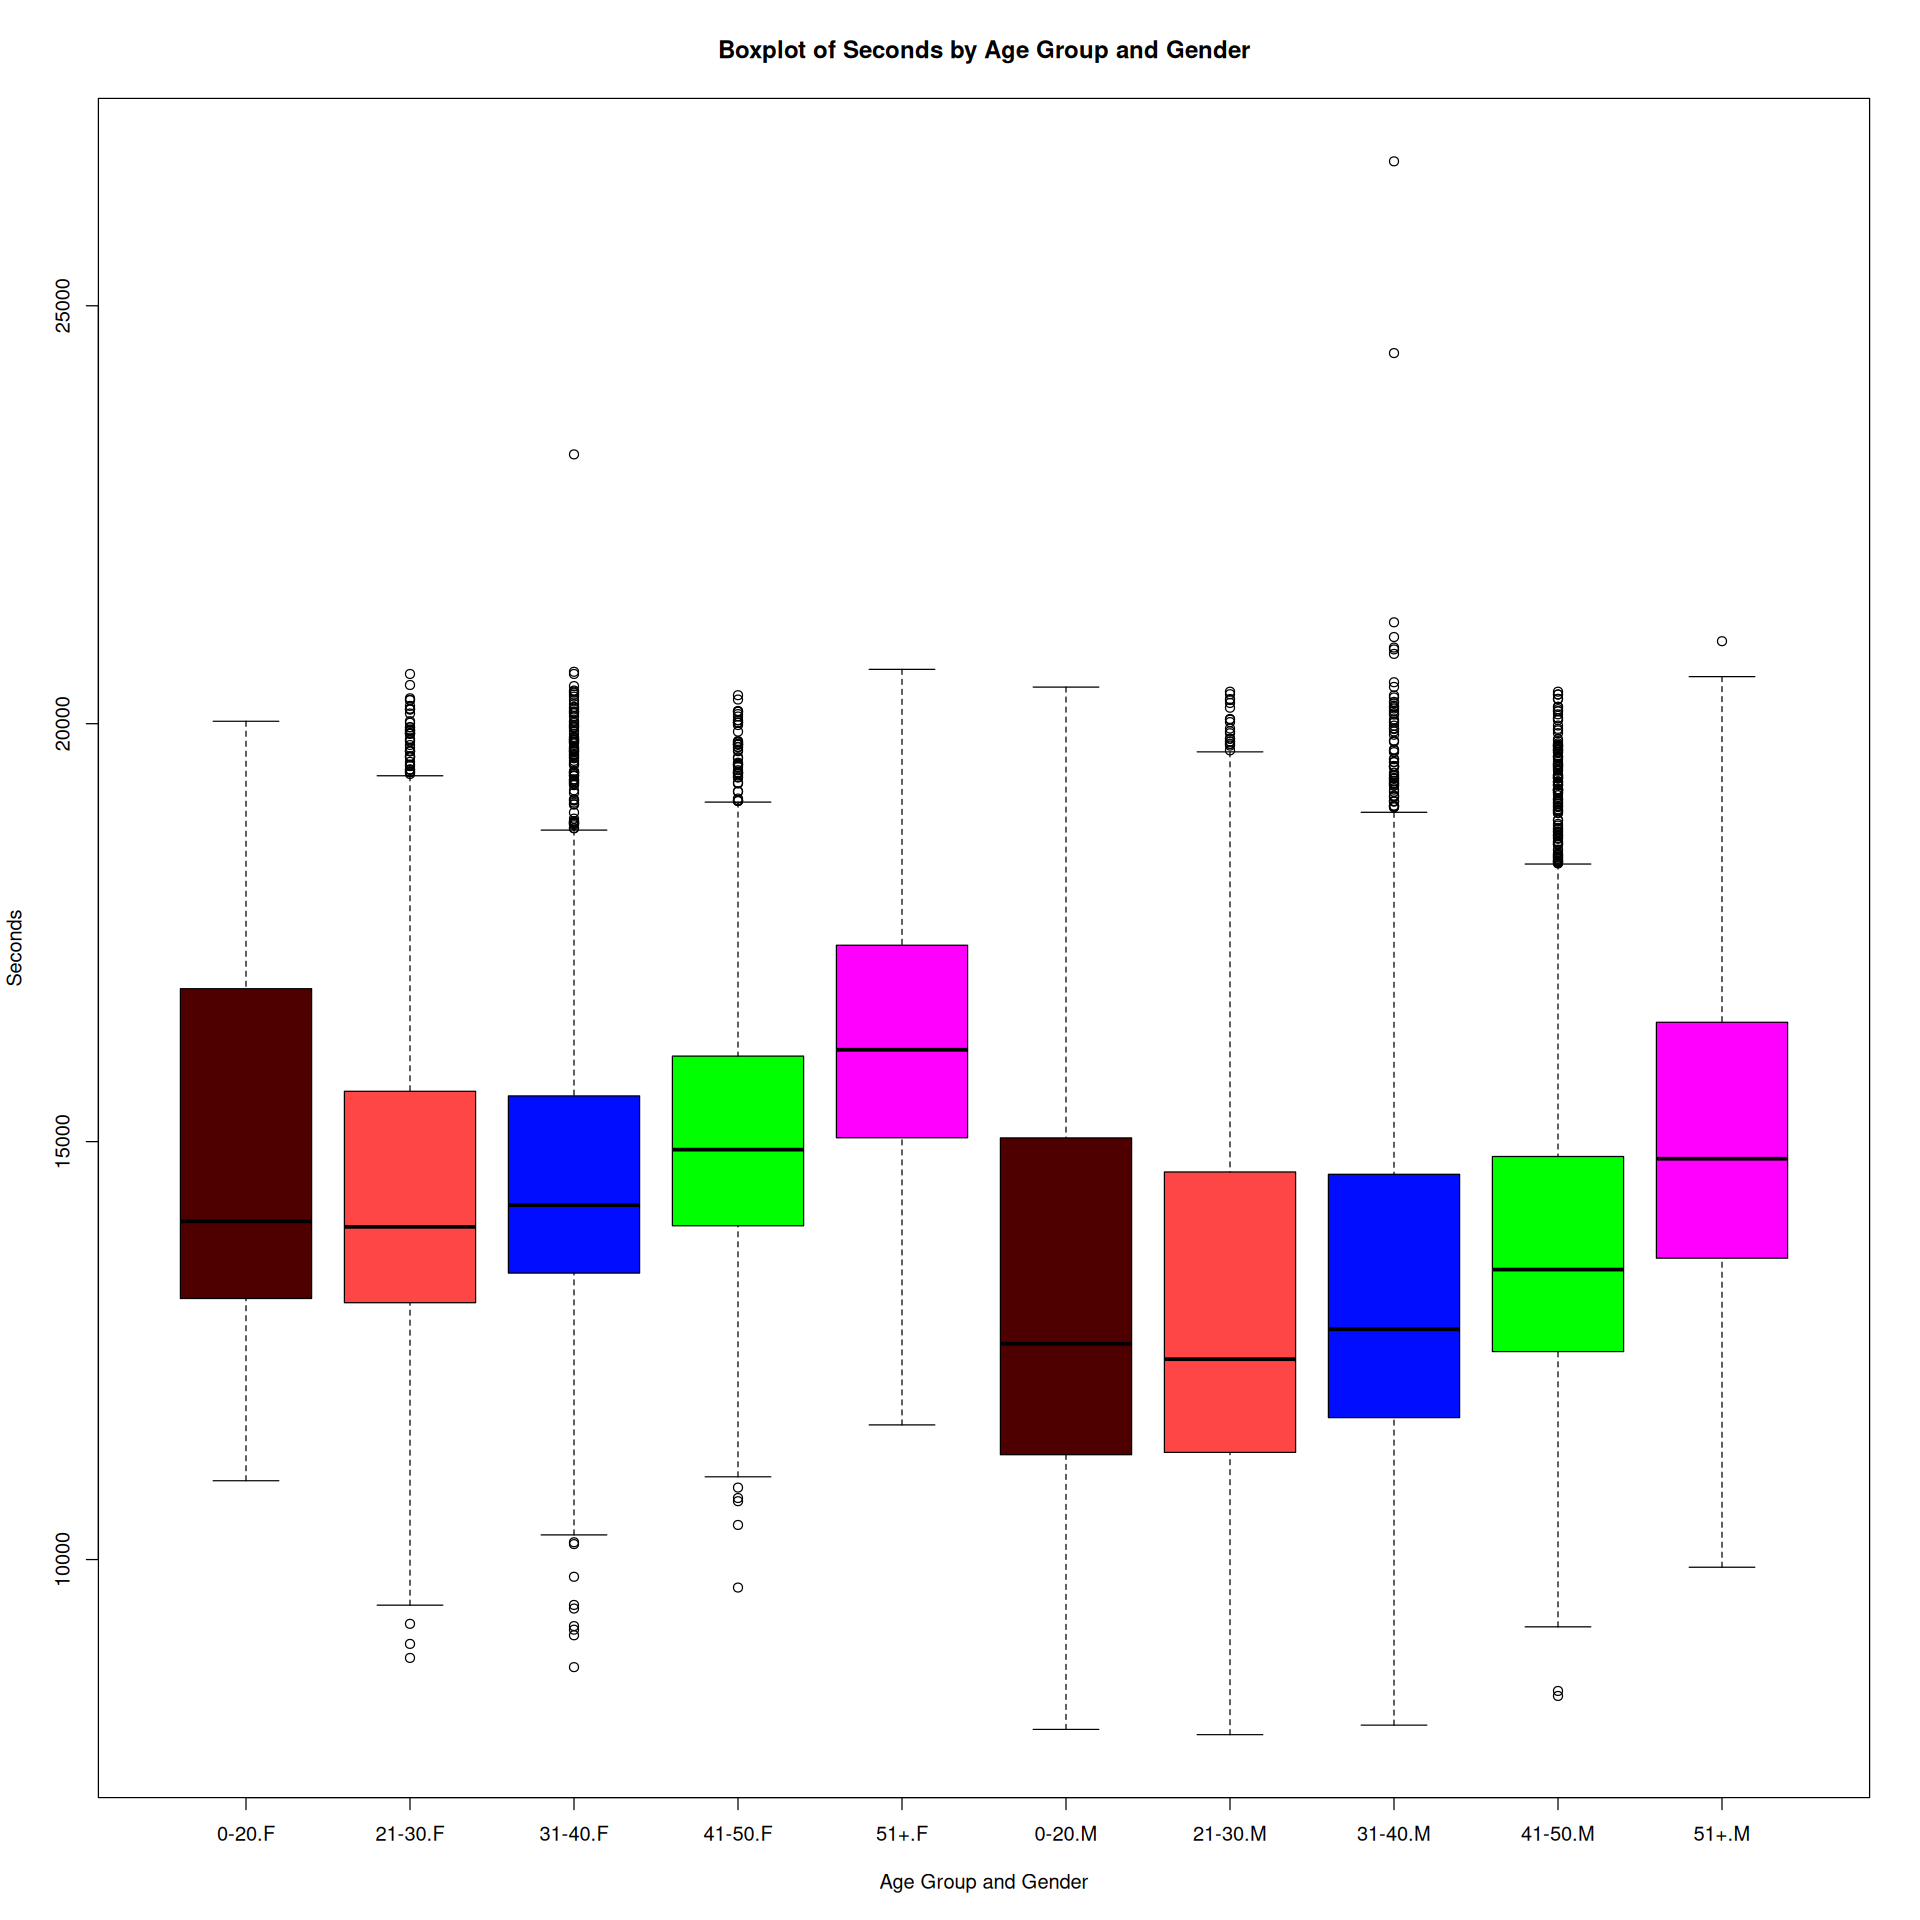

In [43]:
# Create a factor variable combining AgeGroup and gender
maraton_data$AgeGender <- interaction(
  maraton_data$AgeGroup, maraton_data$gender
)

# Calculate the mean for each AgeGender group
mean_seconds <- tapply(maraton_data$seconds, maraton_data$AgeGender, mean)

# Plot the boxplot with abline and color differentiation
plot(
  seconds ~ AgeGender,
  data = maraton_data,
  col = c("#4e0000", "#ff4646", "#000dff", "#00ff00", "#ff00ff"),
  xlab = "Age Group and Gender",
  ylab = "Seconds",
  main = "Boxplot of Seconds by Age Group and Gender"
)

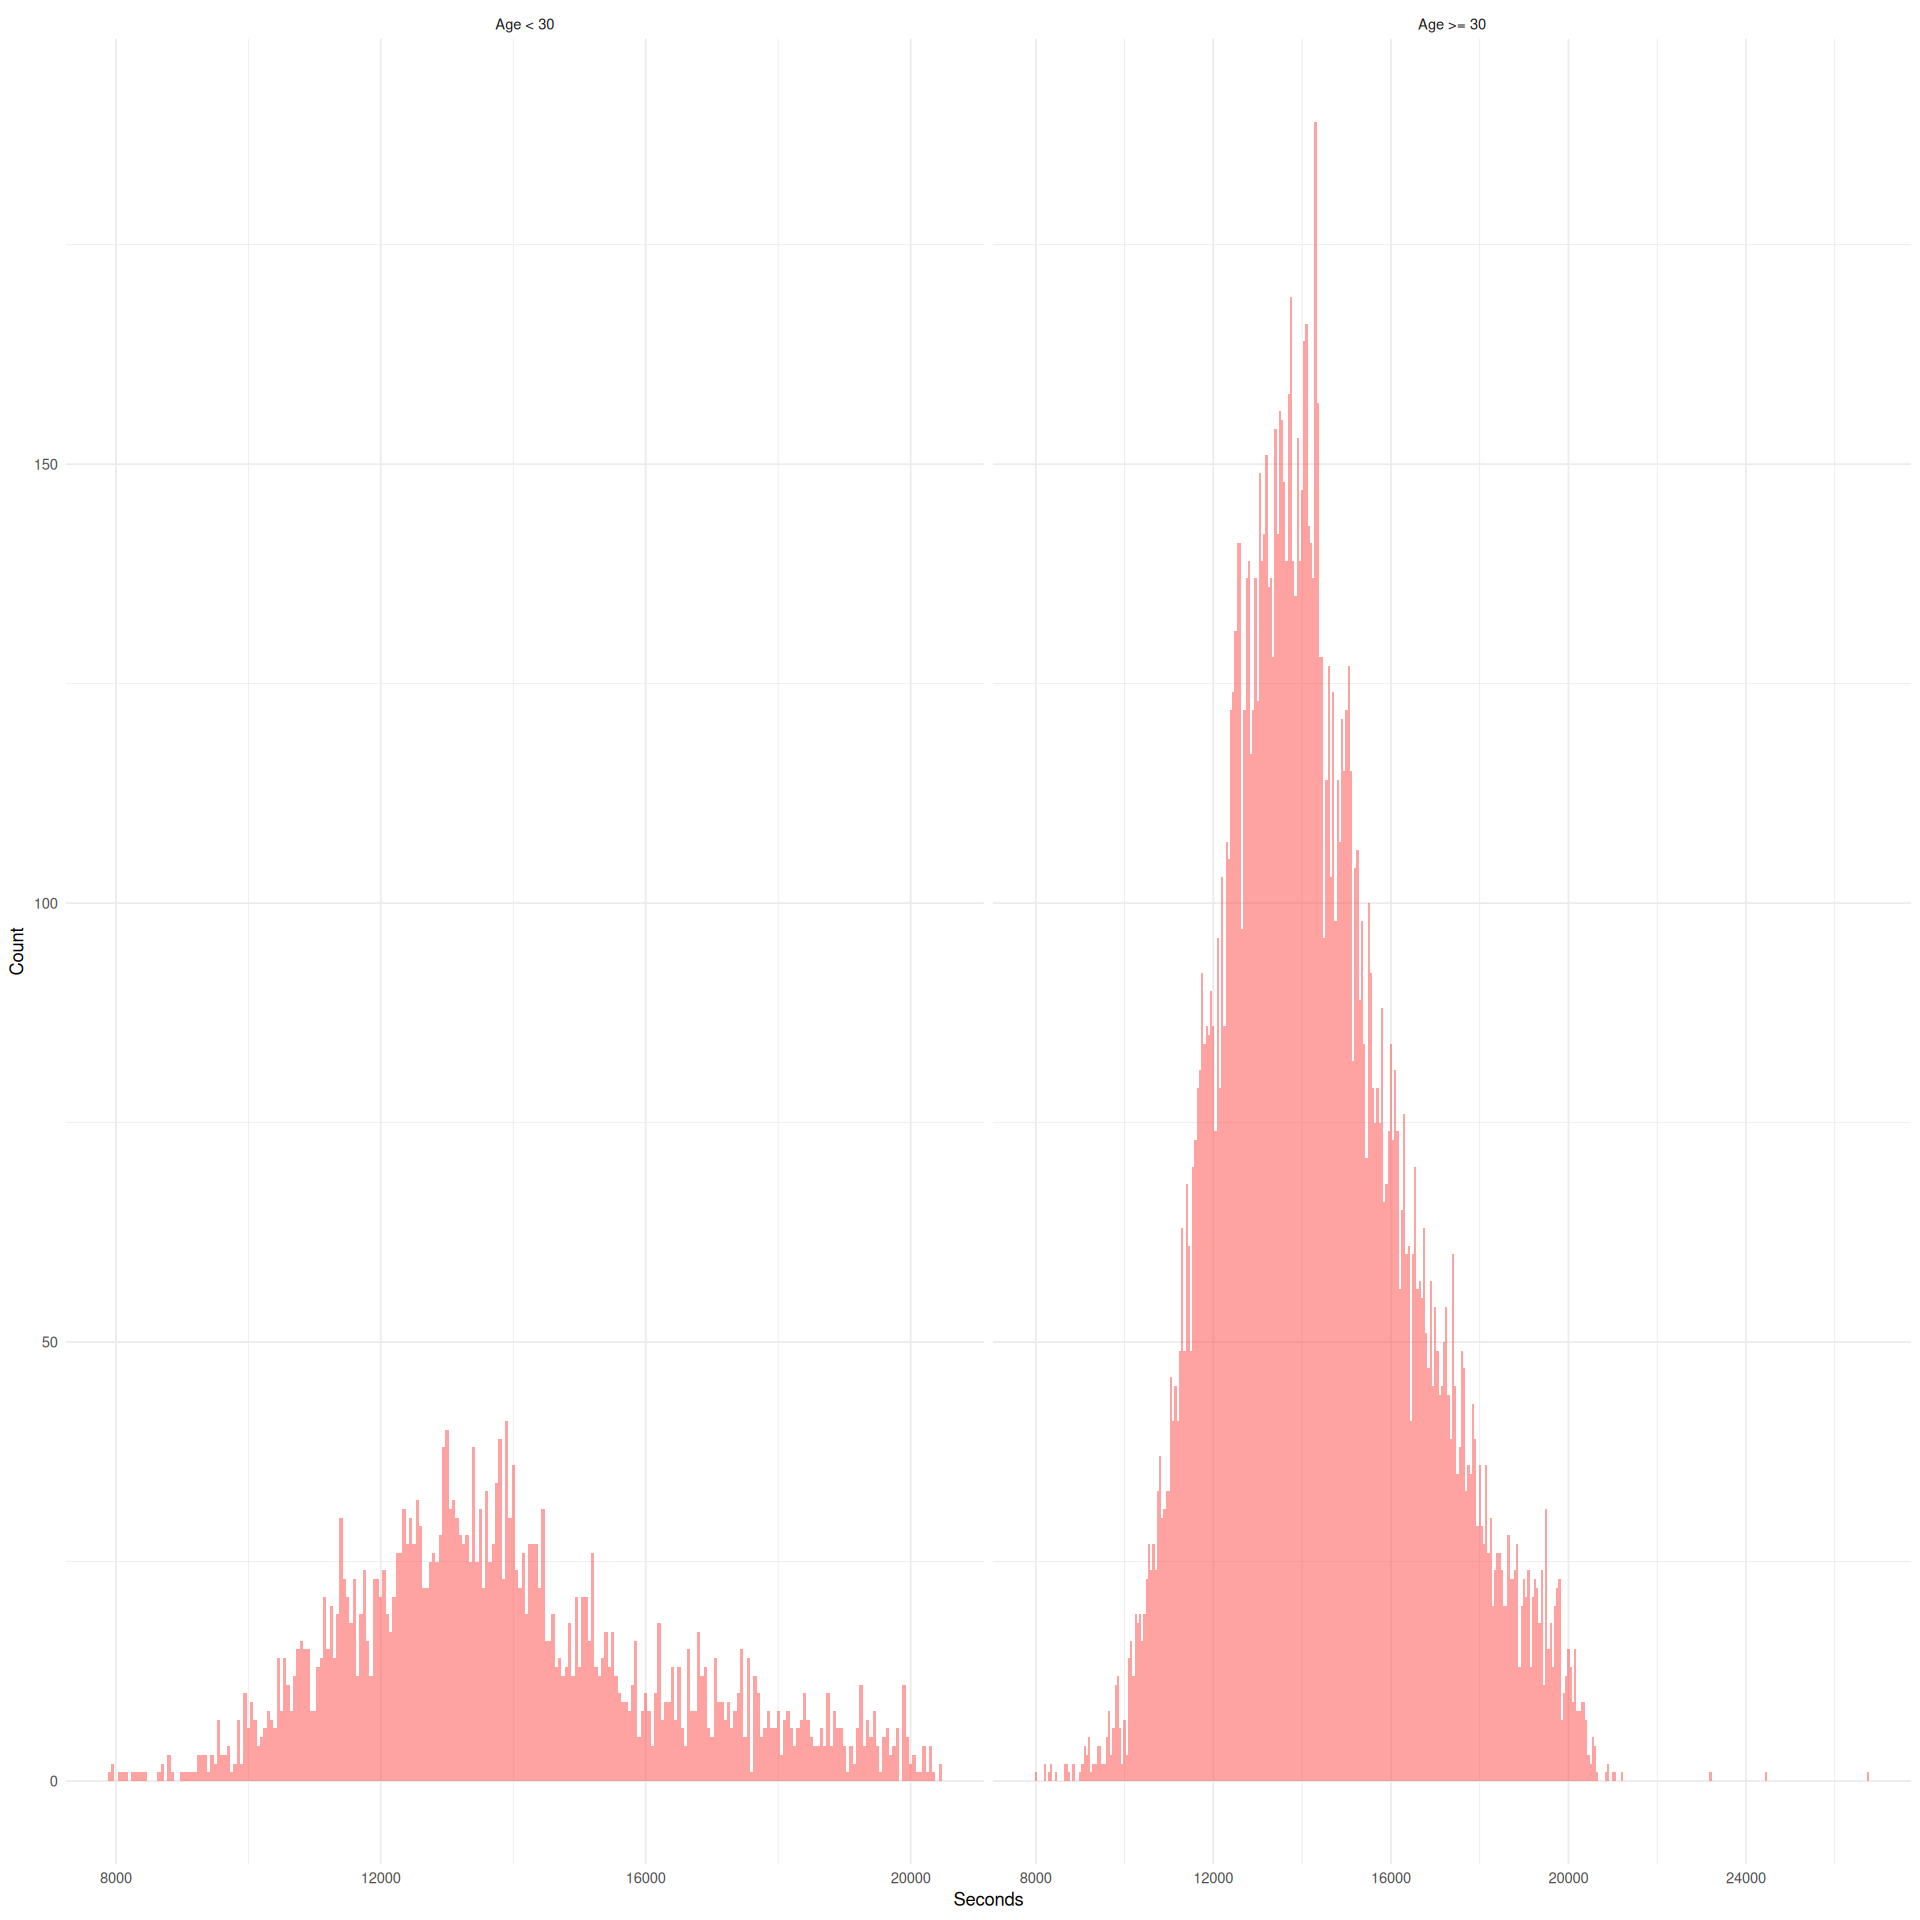

In [40]:
library(ggplot2)

# Create a new column 'AgeGroup' based on the age condition
maraton_data$AgeGroup <- ifelse(maraton_data$age < 30, "Age < 30", "Age >= 30")

# Plot using ggplot2
ggplot(maraton_data, aes(x = seconds)) +
 geom_histogram(binwidth = 50, fill = "#ff4646", alpha = 0.5) +
 facet_wrap(~ AgeGroup, scales = "free_x") +
 labs(x = "Seconds", y = "Count", fill = "Age Group") +
 theme_minimal()

### Test y Modelos :

#### Modelo de edad contra segundos :

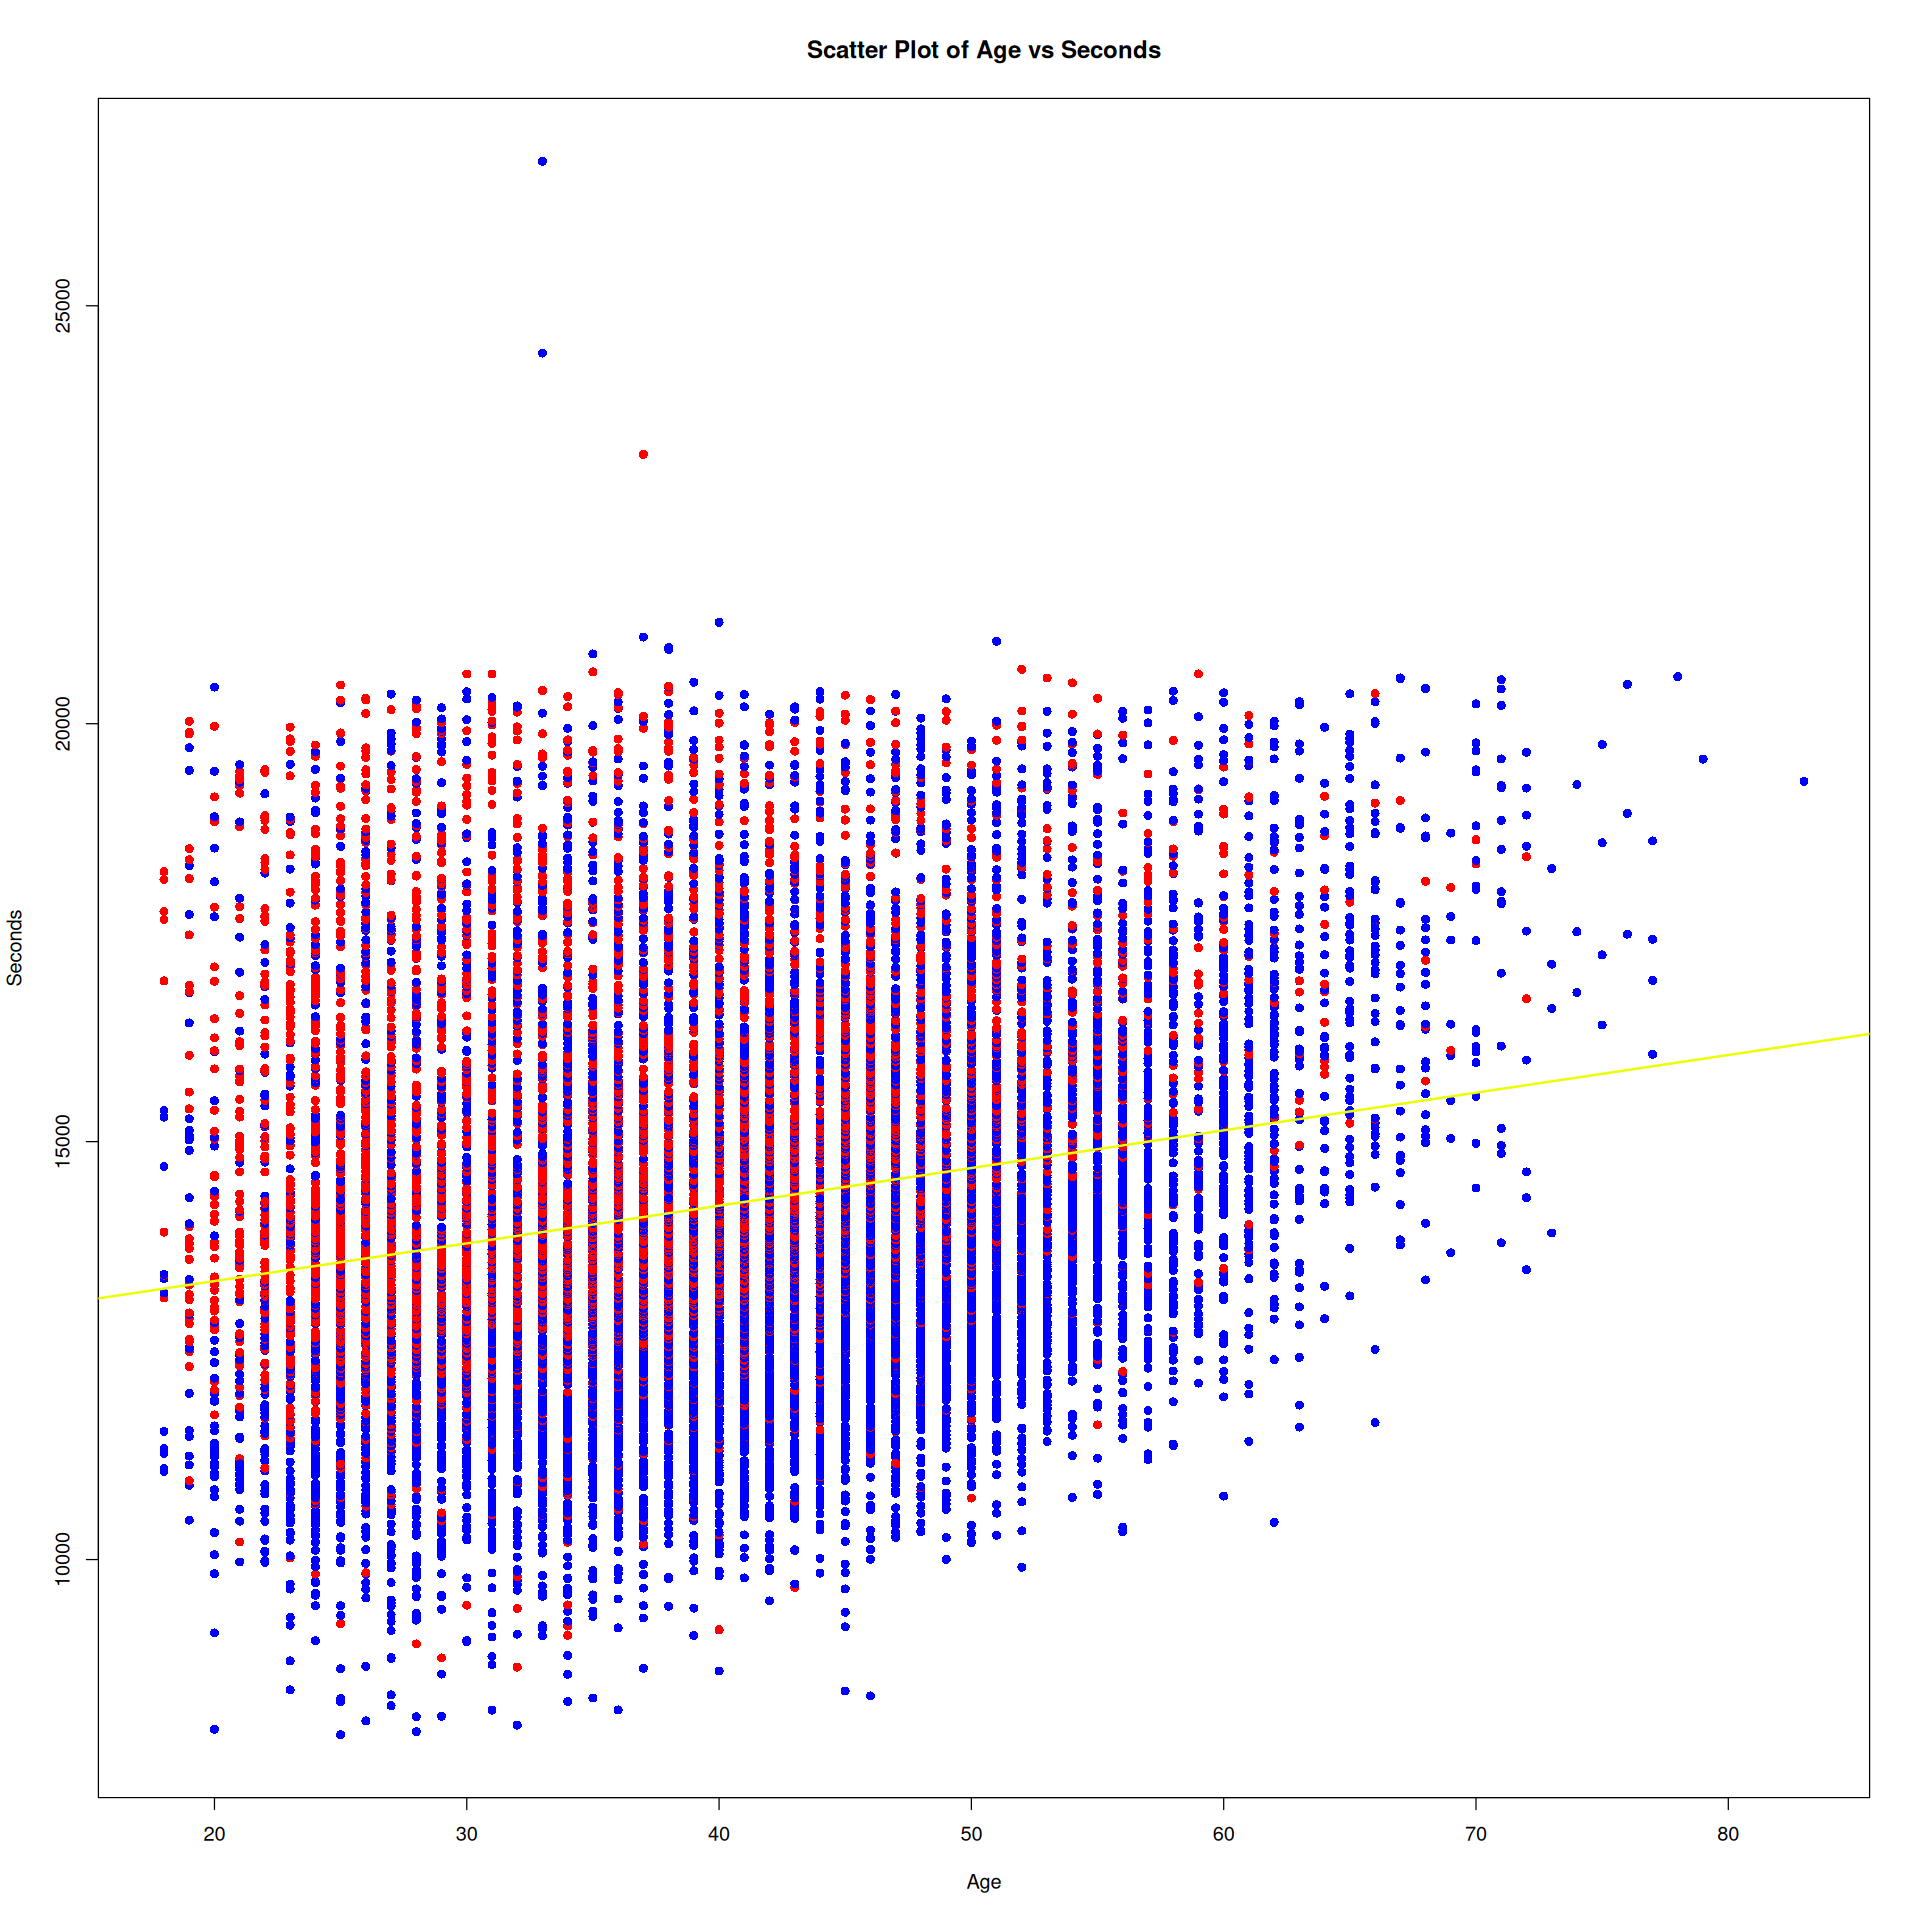

In [35]:
# Scatter plot of age vs seconds with color differentiation by gender
plot(
    maraton_data$age, 
    maraton_data$seconds, 
    col = ifelse(maraton_data$gender == "M", "blue", "red"),
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Scatter Plot of Age vs Seconds",
    pch = 16)

model <- lm(maraton_data$seconds ~ maraton_data$age)

# add line to scatter plot
abline(model, col = "#eaff00", lwd = 2)

#### Chi-Square-Test to a Contingency Table

In [39]:
# Step 2: Calculate the expected frequencies
row_totals <- rowSums(contingency_table)
col_totals <- colSums(contingency_table)
grand_total <- sum(contingency_table)
expected <- outer(row_totals, col_totals) / grand_total

# Step 3: Calculate the chi-square statistic
chi_square <- sum((contingency_table - expected)^2 / expected)

# Step 4: Determine the degrees of freedom
degrees_of_freedom <- (
    nrow(contingency_table) - 1) * (ncol(contingency_table) - 1)

# Step 5: Determine the critical value
critical_value <- qchisq(0.95, df = degrees_of_freedom)

## Rechazar la hiopótesis nula dado que el chi-square es mayor que el critical value. 
print(chi_square)
print(critical_value)

[1] 1351.458
[1] 81.38102


### T-test para chequear si las medias en diferentes samples de la población son las mismas.

In [41]:
# Subset the data for individuals less than 30 years old
less_than_30 <- subset(maraton_data, maraton_data$age < 30)

# Subset the data for individuals 30 years old or older
greater_than_or_equal_to_30 <- subset(maraton_data, maraton_data$age >= 30)


sample1 <- less_than_30[sample(nrow(less_than_30), 1000), ]
sample2 <- greater_than_or_equal_to_30[sample(nrow(greater_than_or_equal_to_30), 1000), ]

# Perform the two-sample t-test
t_test_result <- t.test(sample1$seconds, sample2$seconds)

# Print the t-test result
print(t_test_result)



	Welch Two Sample t-test

data:  sample1$seconds and sample2$seconds
t = -3.4941, df = 1980.7, p-value = 0.0004862
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -557.2778 -156.5942
sample estimates:
mean of x mean of y 
 13858.72  14215.66 



El p-value menor que 0.05 significa que si acepto la hipótesis la probabilidad de haber visto ese resultado es < 0.05.

El Boxplot permite visualizar outliers en cada grupo

### Un ANOVA 

In [44]:
# Doing ANOVA by hand.
overall_mean <- mean(maraton_data$seconds)

# Calculate the group means
group_means <- aggregate(seconds ~ AgeGender, data = maraton_data, FUN = mean)

# Calculate the between group sum of squares
SSB <- sum(group_means$seconds * table(maraton_data$AgeGender)) - sum(maraton_data$seconds)^2/nrow(maraton_data)

# Calculate the total sum of squares
SST <- sum((maraton_data$seconds - overall_mean)^2)

# Calculate the within group sum of squares
SSW <- SST - SSB

# Calculate the degrees of freedom for between groups and within groups
dfb <- nrow(group_means) - 1
dfw <- nrow(maraton_data) - nrow(group_means)

# Calculate the mean square for between groups and within groups
MSB <- SSB / dfb
MSW <- SSW / dfw

# Calculate the F statistic
F <- MSB / MSW

# Print the F statistic
print(F)

# Calculate the p-value
p_value <- 1 - pf(F, dfb, dfw)

# Print the p-value
print(p_value)

[1] -1900.699
[1] 1


,diff,lwr,upr,p adj
21-30.F-0-20.F,-381.055851,-1133.16769,371.0560,8.471008e-01
31-40.F-0-20.F,-231.430524,-980.86992,518.0089,9.935332e-01
41-50.F-0-20.F,207.794047,-544.01572,959.6038,9.971982e-01
51+.F-0-20.F,1352.044014,559.54582,2144.5422,3.071761e-06
0-20.M-0-20.F,-1505.685285,-2544.34754,-467.0230,1.951896e-04
21-30.M-0-20.F,-1783.585545,-2540.96913,-1026.2020,3.374571e-08
31-40.M-0-20.F,-1548.329191,-2294.82755,-801.8308,3.618334e-08
41-50.M-0-20.F,-1071.042224,-1814.97420,-327.1103,2.262102e-04
51+.M-0-20.F,209.337530,-539.37188,958.0469,9.969388e-01
31-40.F-21-30.F,149.625327,-54.64730,353.8980,3.773469e-01


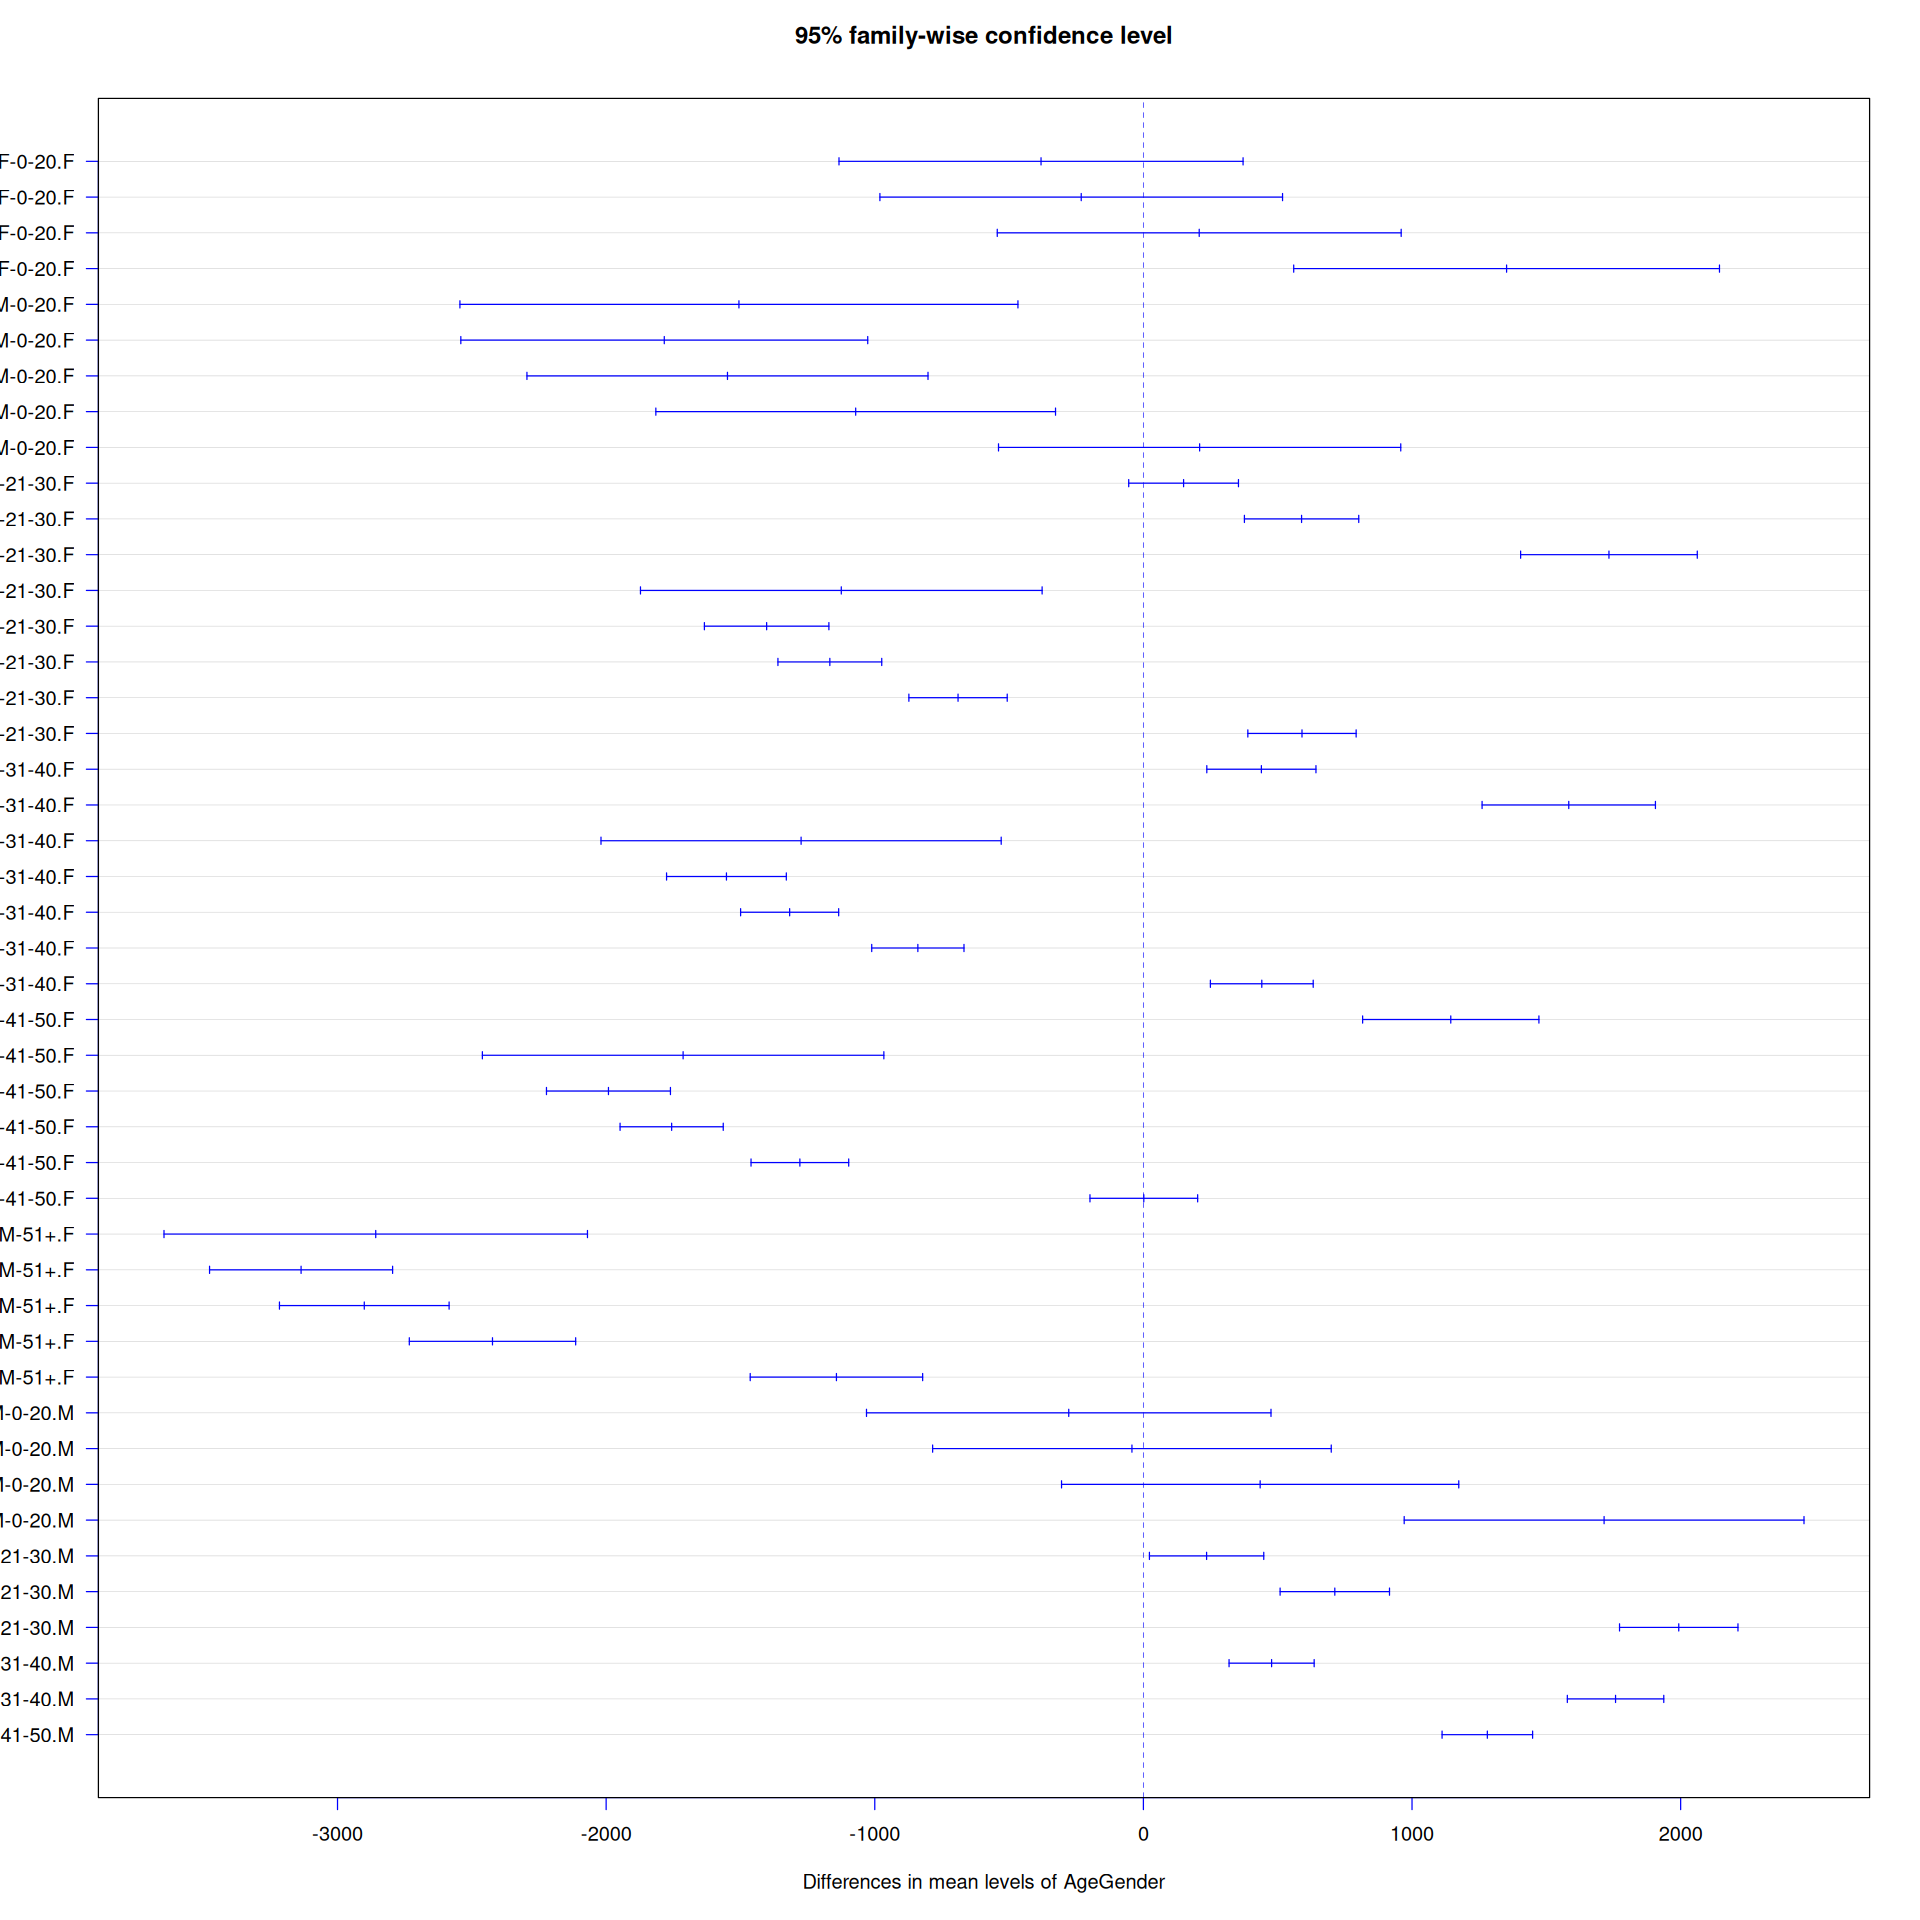

In [45]:
# Fit the linear model
model <- aov(seconds ~ AgeGender, data = maraton_data)

# Perform Tukey's HSD test
posthoc <- TukeyHSD(model, "AgeGender")

head(posthoc)

# Plot the Tukey's HSD test results
plot(posthoc, las = 1, col = "blue")


The length of the segment in a Tukey's HSD plot represents the range of the confidence interval for the difference in means between two groups. 

A longer segment indicates a larger confidence interval, which suggests more uncertainty about the exact difference in means between the two groups. This could be due to a larger standard deviation or a smaller sample size in one or both of the groups.

A shorter segment indicates a smaller confidence interval, suggesting less uncertainty about the exact difference in means. This could be due to a smaller standard deviation or a larger sample size.

The segments in the Tukey's HSD (Honest Significant Difference) plot represent confidence intervals for the difference in means between each pair of groups.

Each line (segment) corresponds to a pair of groups. The position of the line along the x-axis represents the range of the confidence interval for the difference in means between those two groups.

If a line crosses the vertical line at 0, it means that the confidence interval for the difference in means between those two groups includes 0. In other words, there is no statistically significant difference between the means of those two groups at the chosen significance level.

If a line does not cross the vertical line at 0, it means that the confidence interval for the difference in means between those two groups does not include 0. This implies that there is a statistically significant difference between the means of those two groups at the chosen significance level.



R Squared es bajo, lo que significa que el modelo no predecirá bien. el R-coeciente-cuadrado mide la proporción de la varianza de la variable dependiente que es justificado por las variables independientes, o sea mientras más bajo menos eficiente es el modelo para predecir datos que varien más con respecto a la media.

In [51]:
data <- read.csv("results2005.csv")

data1 <- subset(data, (age < 20))
data2 <- subset(data, (age > 60))

head(data1)
head(data2)


,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
320,Daniel T. Jr. Haggerty,19,M,Needham,00:09:06,3:58:49,10019,6966,22,14329,Daniel T. Jr.,Haggerty
1303,Benjamin Emmanuel,19,M,Wheaton,00:07:08,3:07:18,1103,1029,6,11238,Benjamin,Emmanuel
1338,Andrew R. Wien,18,M,Marietta,00:07:09,3:07:50,1138,1061,7,11270,Andrew R.,Wien
1478,Andrew H. Kless,18,M,Rochester,00:09:20,4:05:03,11076,7482,23,14703,Andrew H.,Kless
1964,Nicholas A. Rizzo,19,M,Cambridge,00:09:28,4:08:15,11559,7733,24,14895,Nicholas A.,Rizzo
1965,Nicholas J. Lynch,19,M,Milton,00:09:28,4:08:15,11559,7733,24,14895,Nicholas J.,Lynch


,display_name,age,gender,residence,pace,official_time,overall,gender_result,division_result,seconds,first_name,last_name
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
303,Thomas W. Cummins,65,M,Cincinnati,00:09:06,3:58:44,9997,6952,12,14324,Thomas W.,Cummins
325,Bob L. Daly,72,M,,00:09:06,3:58:50,10021,6967,4,14330,Bob L.,Daly
372,Dick Rawdon,61,M,GEORGETOWN,00:09:07,3:59:03,10068,6983,88,14343,Dick,Rawdon
402,Eli Colom,63,M,Wayne,00:09:07,3:59:11,10101,7002,89,14351,Eli,Colom
426,Jim Syracuse,65,M,Westbrook,00:09:07,3:59:19,10123,7016,13,14359,Jim,Syracuse
439,James A. Schroeder,61,M,Clarkston,00:09:07,3:59:21,10135,7024,90,14361,James A.,Schroeder


### Z Statistics

In [52]:
# Z-statistics states how many standards errors unit away are the two samples, this allows making all the data in the same scale, so that it can be compared data of different kind of measurements.

# Compute the means
mean1 <- mean(data1$seconds)
mean2 <- mean(data2$seconds)

# Compute the standard deviations.
sd1 <- sd(data1$seconds)
sd2 <- sd(data2$seconds)

# Compute the standard error of the difference between the means.
se <- sqrt(
    (sd1^2 / length(data1$seconds)) + (sd2^2 / length(data2$seconds))
)

# Compute the Z statistic.
z <- (mean1 - mean2) / se



# Compute the p-value.
p_value <- 2 * (1 - pnorm(abs(z)))

# Print the Z statistic and the p-value.
print(paste("Z statistic: ", z))
print(paste("p-value: ", p_value))

[1] "Z statistic:  -6.42876815963688"
[1] "p-value:  1.28642207997132e-10"


### check whether two samples are statistically different from each other, null hipothesis is that mean is the same, Welch Two-Sample t-est is for when variance is not equal, and data is not normally distributed.

In [53]:


# Take a sample of 30 rows from data1
sample1 <- maraton_data[sample(nrow(maraton_data), 100), ]

# Take a sample of 30 rows from data2
sample2 <- maraton_data[sample(nrow(maraton_data), 100), ]

# Perform t-test for independent samples
t_test <- t.test(sample1$seconds, sample2$seconds)

# Print the results
print(t_test)


	Welch Two Sample t-test

data:  sample1$seconds and sample2$seconds
t = 0.92944, df = 197.89, p-value = 0.3538
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -335.8839  934.7439
sample estimates:
mean of x mean of y 
 14398.46  14099.03 



In [54]:
# Perform Kolmogorov-Smirnov test
ks_test <- ks.test(sample1$seconds, sample2$seconds)

# Print the results
print(ks_test)

# This p-value may lead to an error of type1 because we know before hand that data came from the same distribution.

Warning message in ks.test.default(sample1$seconds, sample2$seconds):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample1$seconds and sample2$seconds
D = 0.12, p-value = 0.4676
alternative hypothesis: two-sided



### Otro test de Chi-Cuadrado, esta vez con variables categoricas diferentes.

The Chi-square test is a statistical test that's used to determine if there is a significant association between two categorical variables in a sample. It compares the observed frequencies (how often each category actually occurred) with the expected frequencies (how often each category would occur if there was no association between the variables).

The Chi-square test works by calculating a statistic, called the Chi-square statistic, which follows a Chi-square distribution when the null hypothesis is true. The null hypothesis for a Chi-square test is that there is no association between the variables.

             
              Fast Moderate Slow
  Young         37      103   19
  Semi-Young   687     2339  240
  Young Adult 1034     3895  309
  Adult        649     5001  296
  Semi-Old      91     2054  205
  Old            6      426  135

	Pearson's Chi-squared test

data:  contingency_table
X-squared = 893.79, df = 10, p-value < 2.2e-16



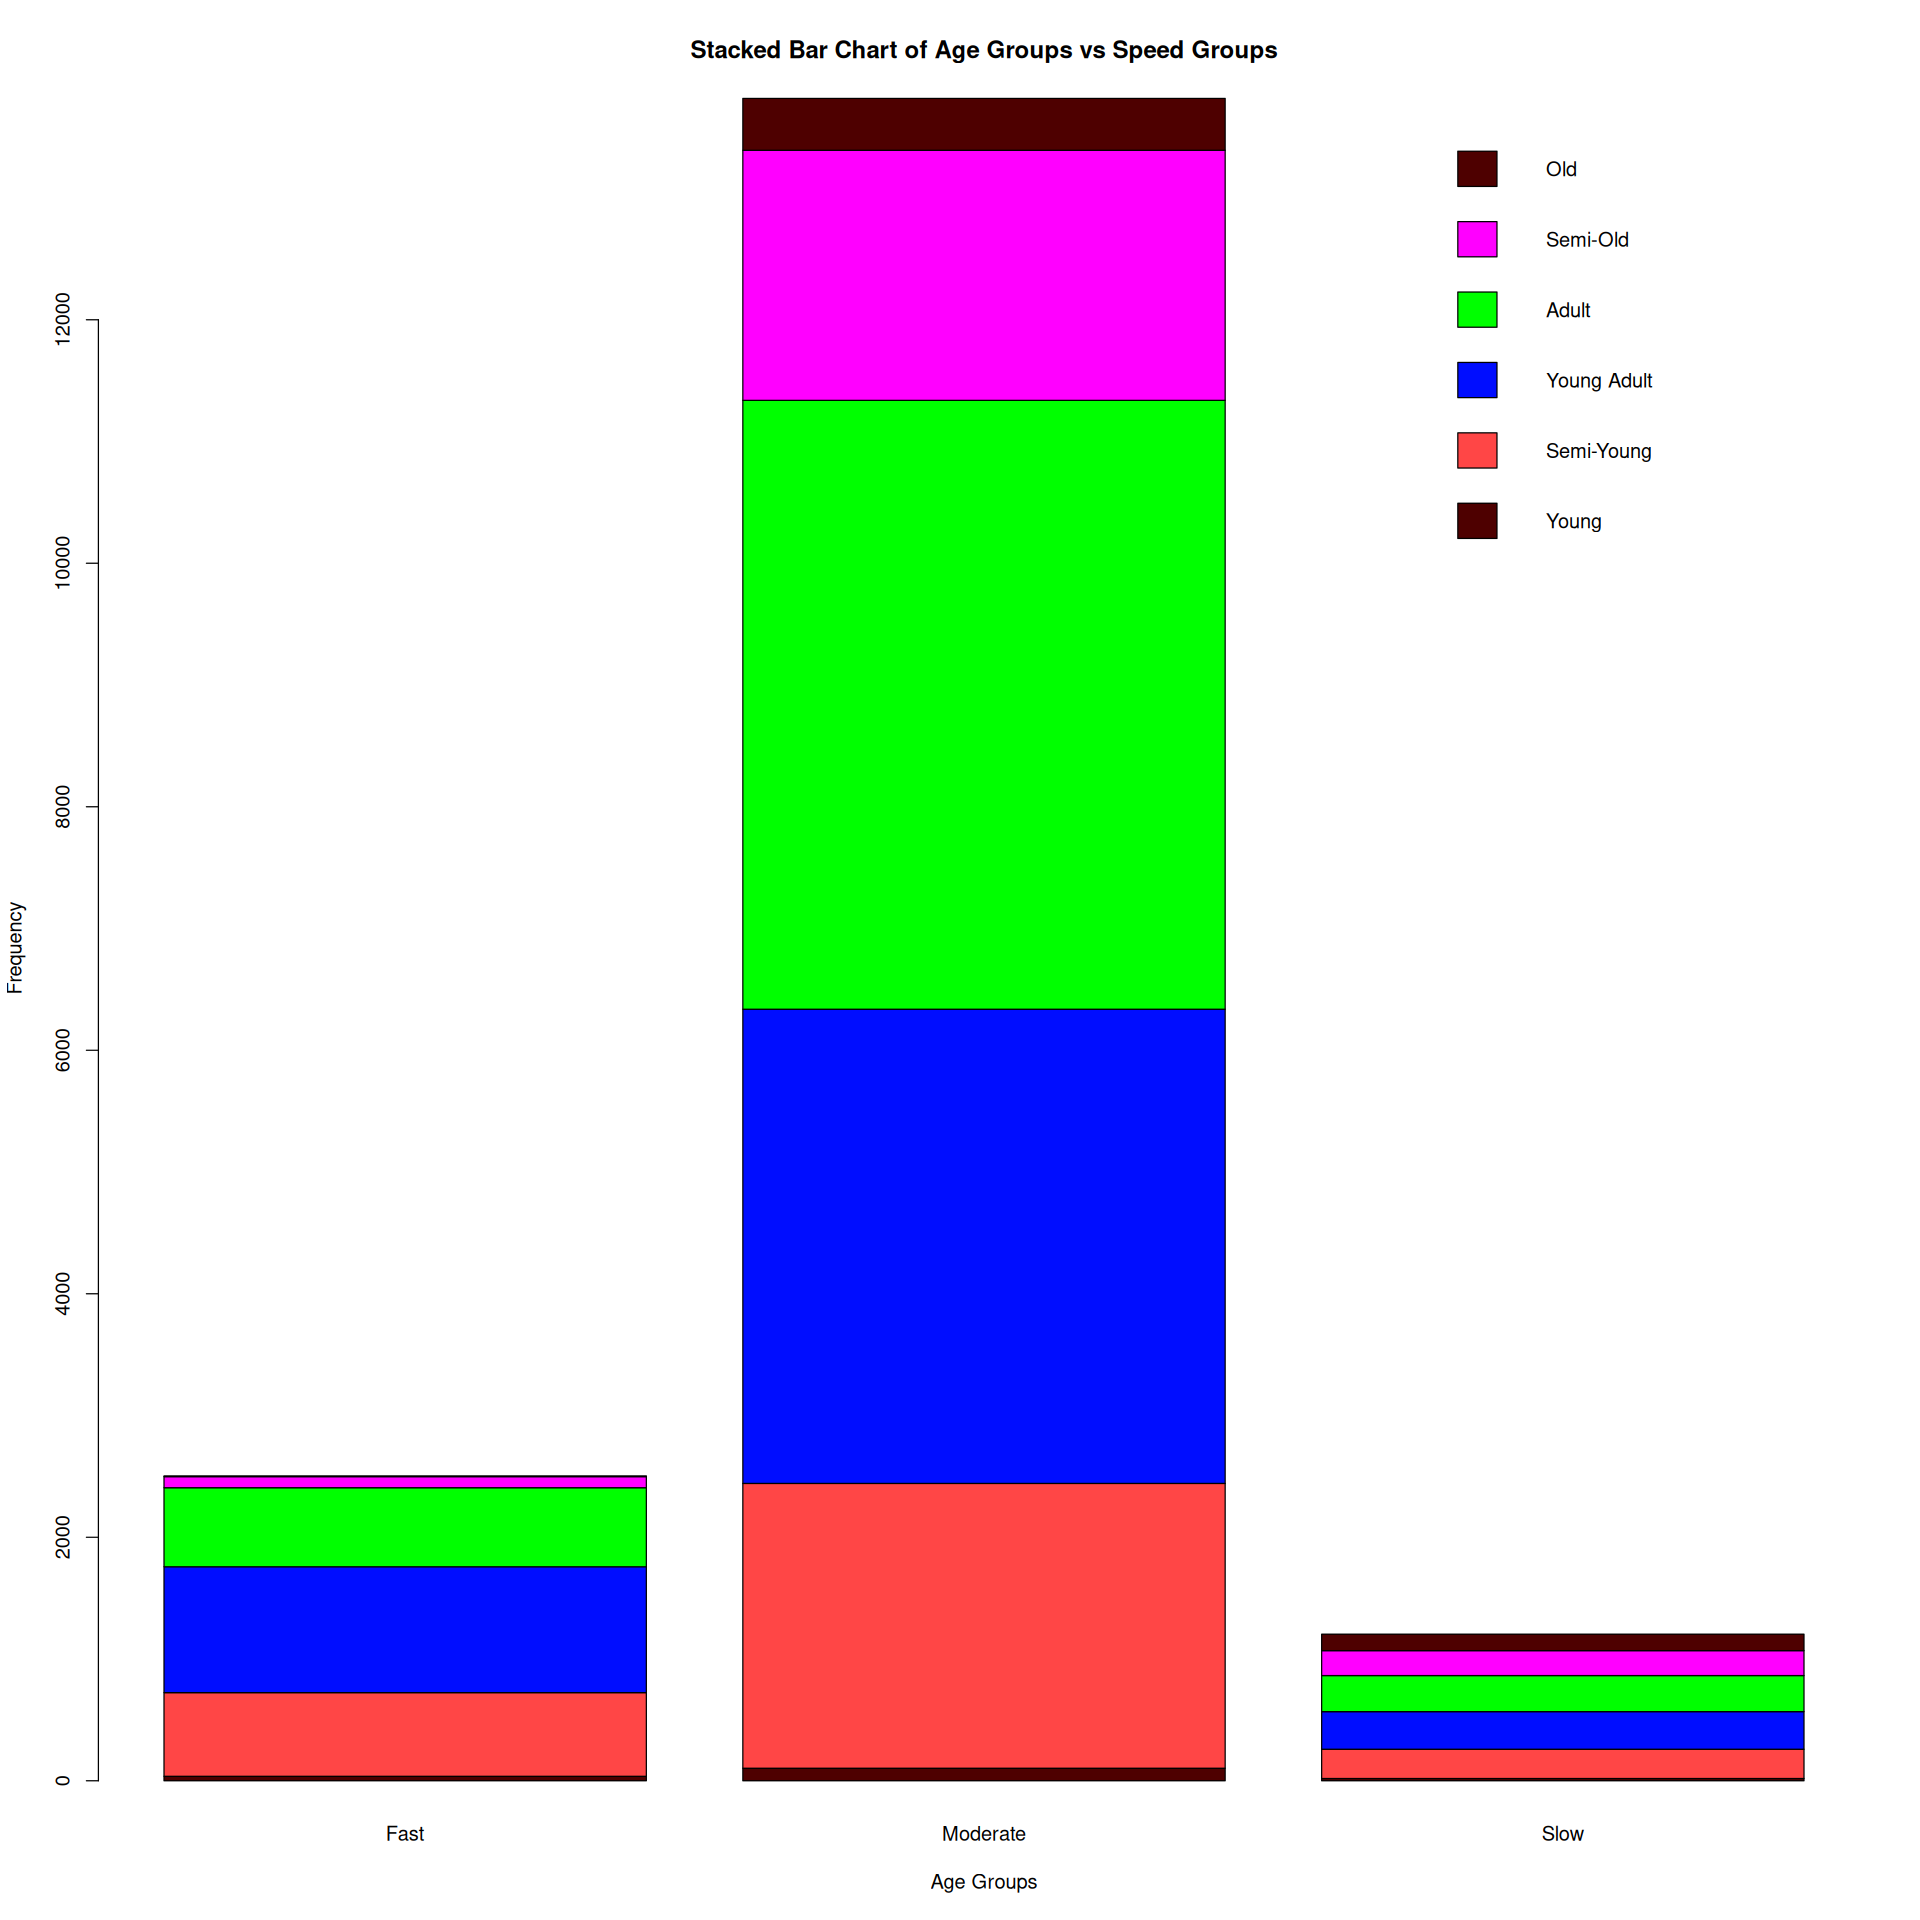

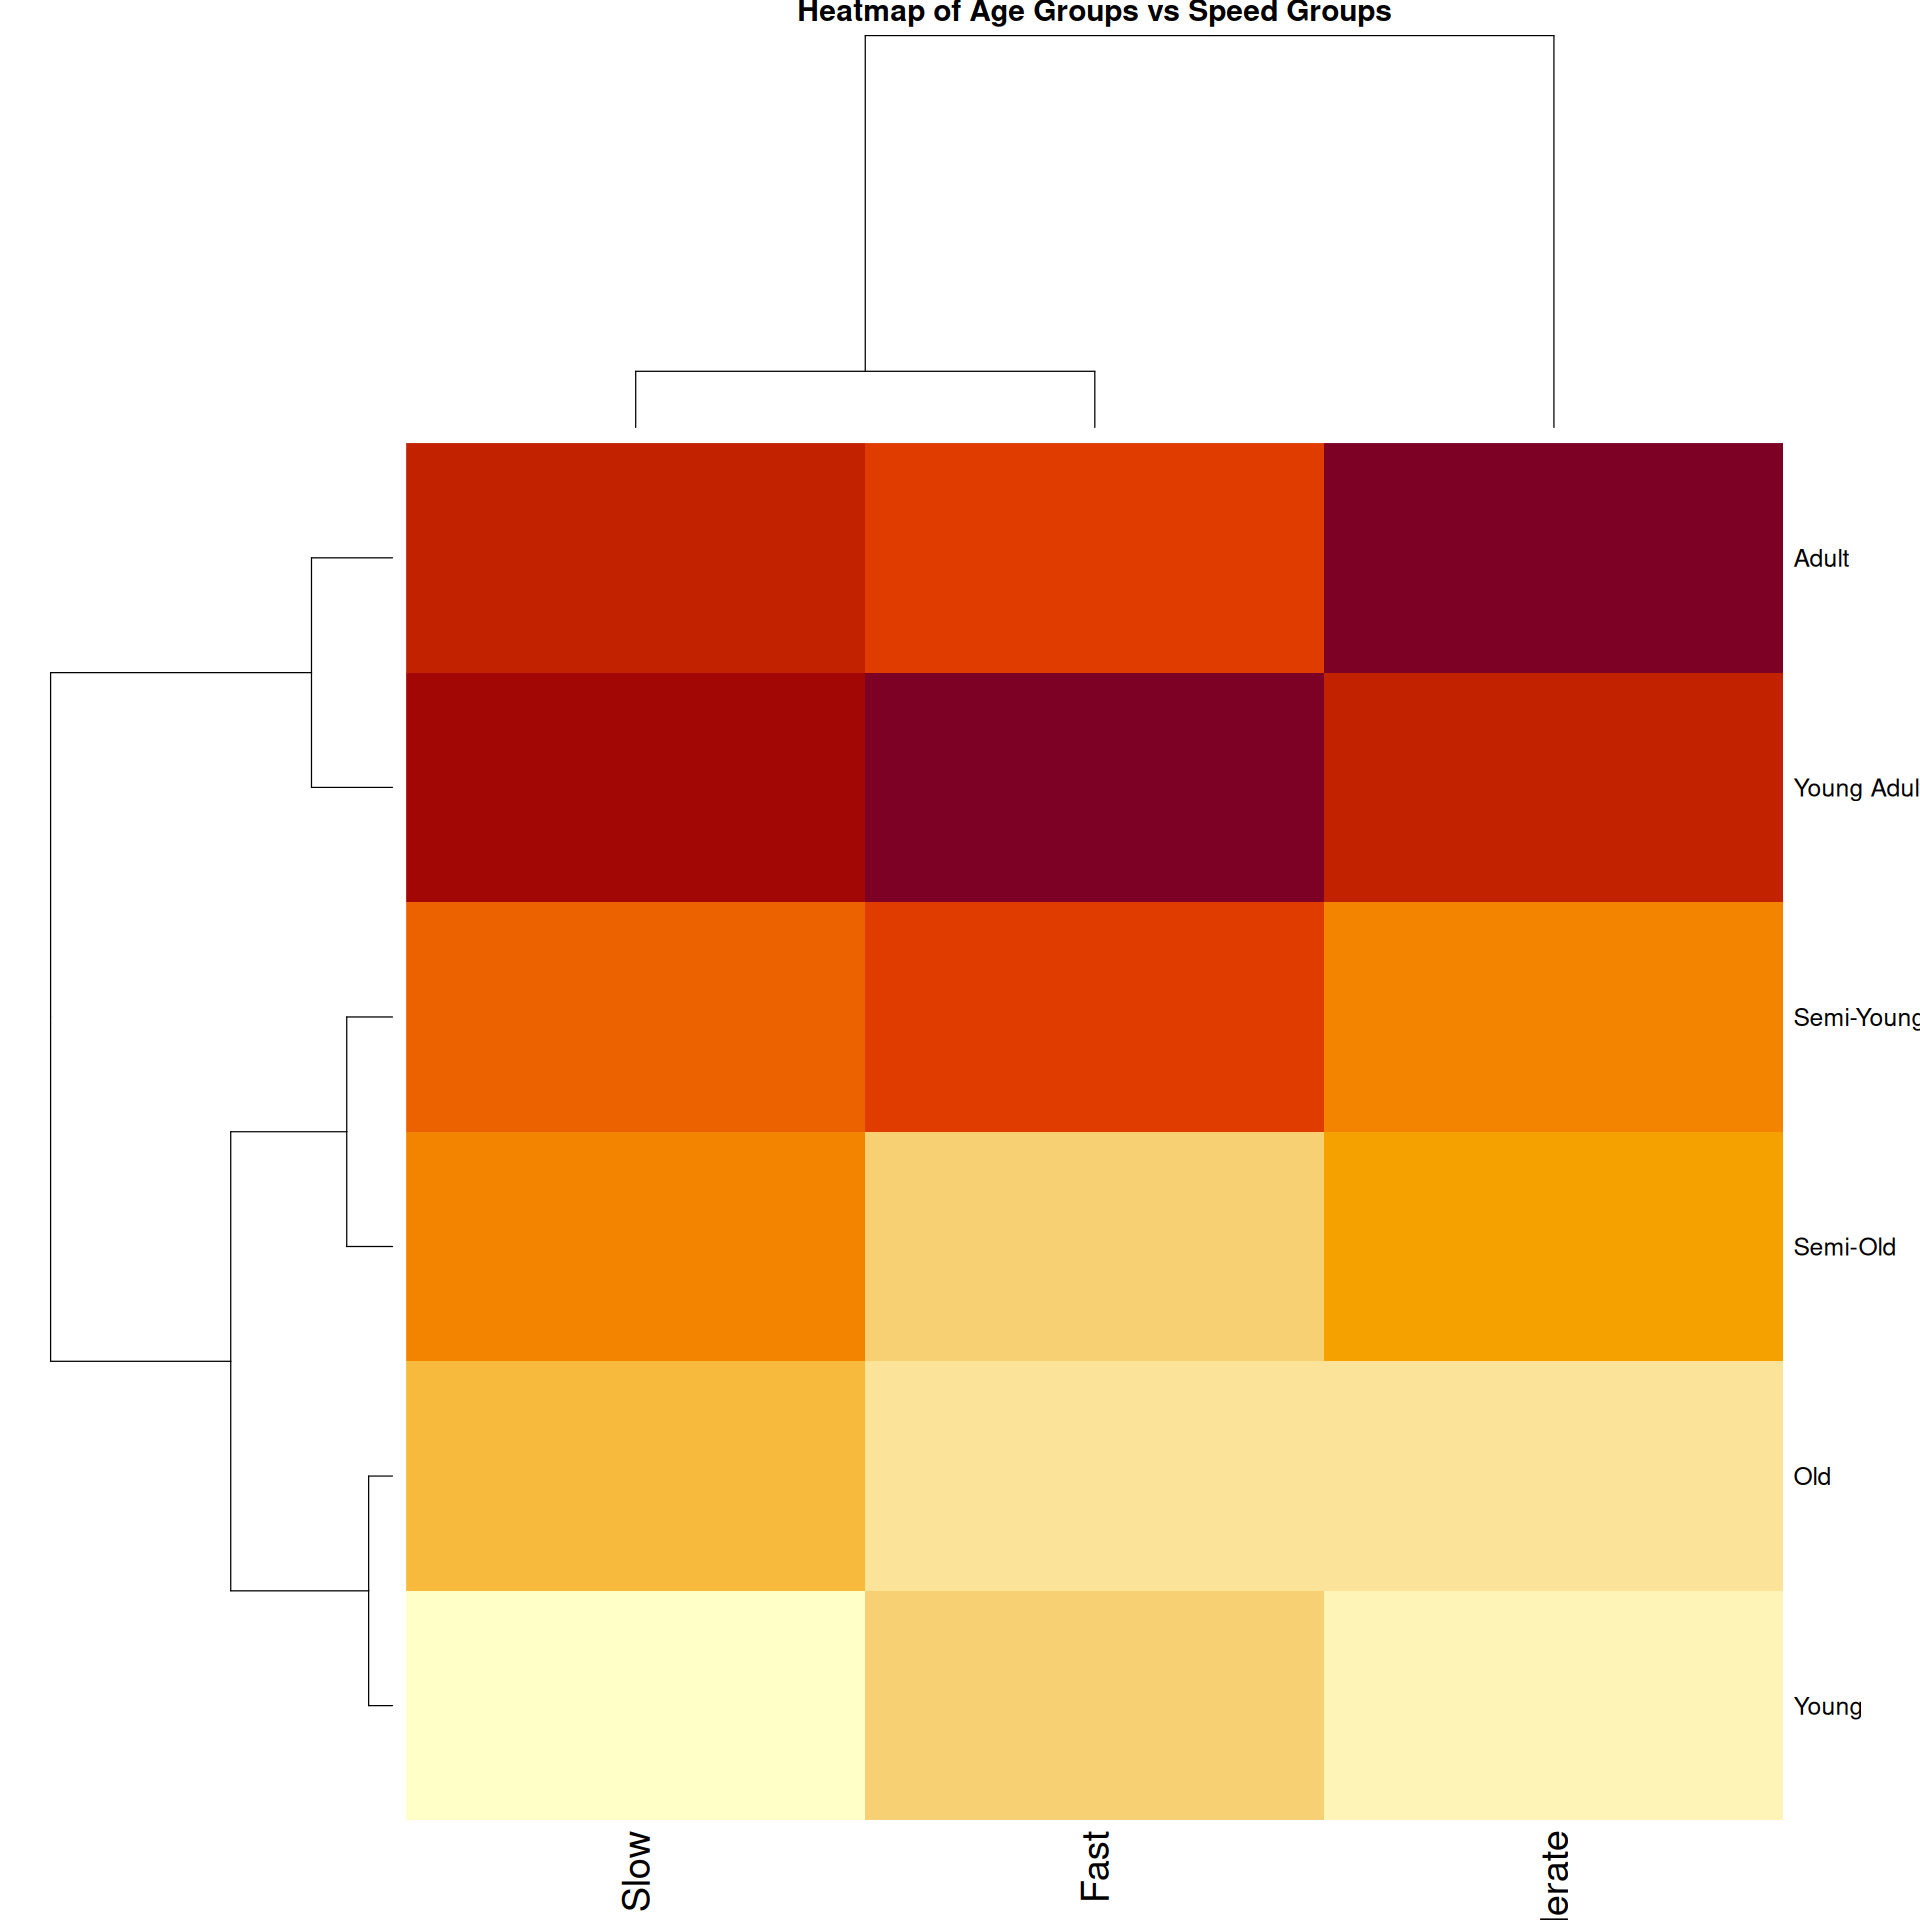

In [55]:
# Create the contingency table

# Age groups vs Speed Groups, hypotesis is that there is no relationship between age and speed.

# Define the classification criteria


classificationAge <- cut(
    maraton_data$age,
    breaks = c(0, 20, 30, 40, 50, 60, Inf),
    labels = c("Young", "Semi-Young", "Young Adult", "Adult", "Semi-Old", "Old")
)


maraton_data$ClassificationAge <- classificationAge

contingency_table <- table(
    maraton_data$ClassificationAge, 
    maraton_data$ClassificationSpeed
)

# Print the contingency table
print(contingency_table)

# Perform chi-square test
chi_square_test <- chisq.test(contingency_table)

# degrees of freedom is (r-1)(c-1).

# Print the results
print(chi_square_test)

# Create the stacked bar chart
barplot(contingency_table, 
        main = "Stacked Bar Chart of Age Groups vs Speed Groups",
        xlab = "Age Groups",
        ylab = "Frequency",
        col = c("#4e0000", "#ff4646", "#000dff", "#00ff00", "#ff00ff"),
        legend = rownames(contingency_table),
        args.legend = list(x = "topright", bty = "n")
)

heatmap(
    contingency_table, 
    scale = "column", 
    main = "Heatmap of Age Groups vs Speed Groups"
)

### Modelo de Regresión Linear con visualización de los supuestos incluido.


Call:
lm(formula = gender_numeric ~ age + seconds, data = maraton_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0882 -0.3329 -0.1742  0.4755  1.0120 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.054e-01  2.370e-02   4.446 8.81e-06 ***
age         -1.548e-02  3.319e-04 -46.652  < 2e-16 ***
seconds      6.324e-05  1.563e-06  40.448  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4467 on 17523 degrees of freedom
Multiple R-squared:  0.1525,	Adjusted R-squared:  0.1524 
F-statistic:  1576 on 2 and 17523 DF,  p-value: < 2.2e-16


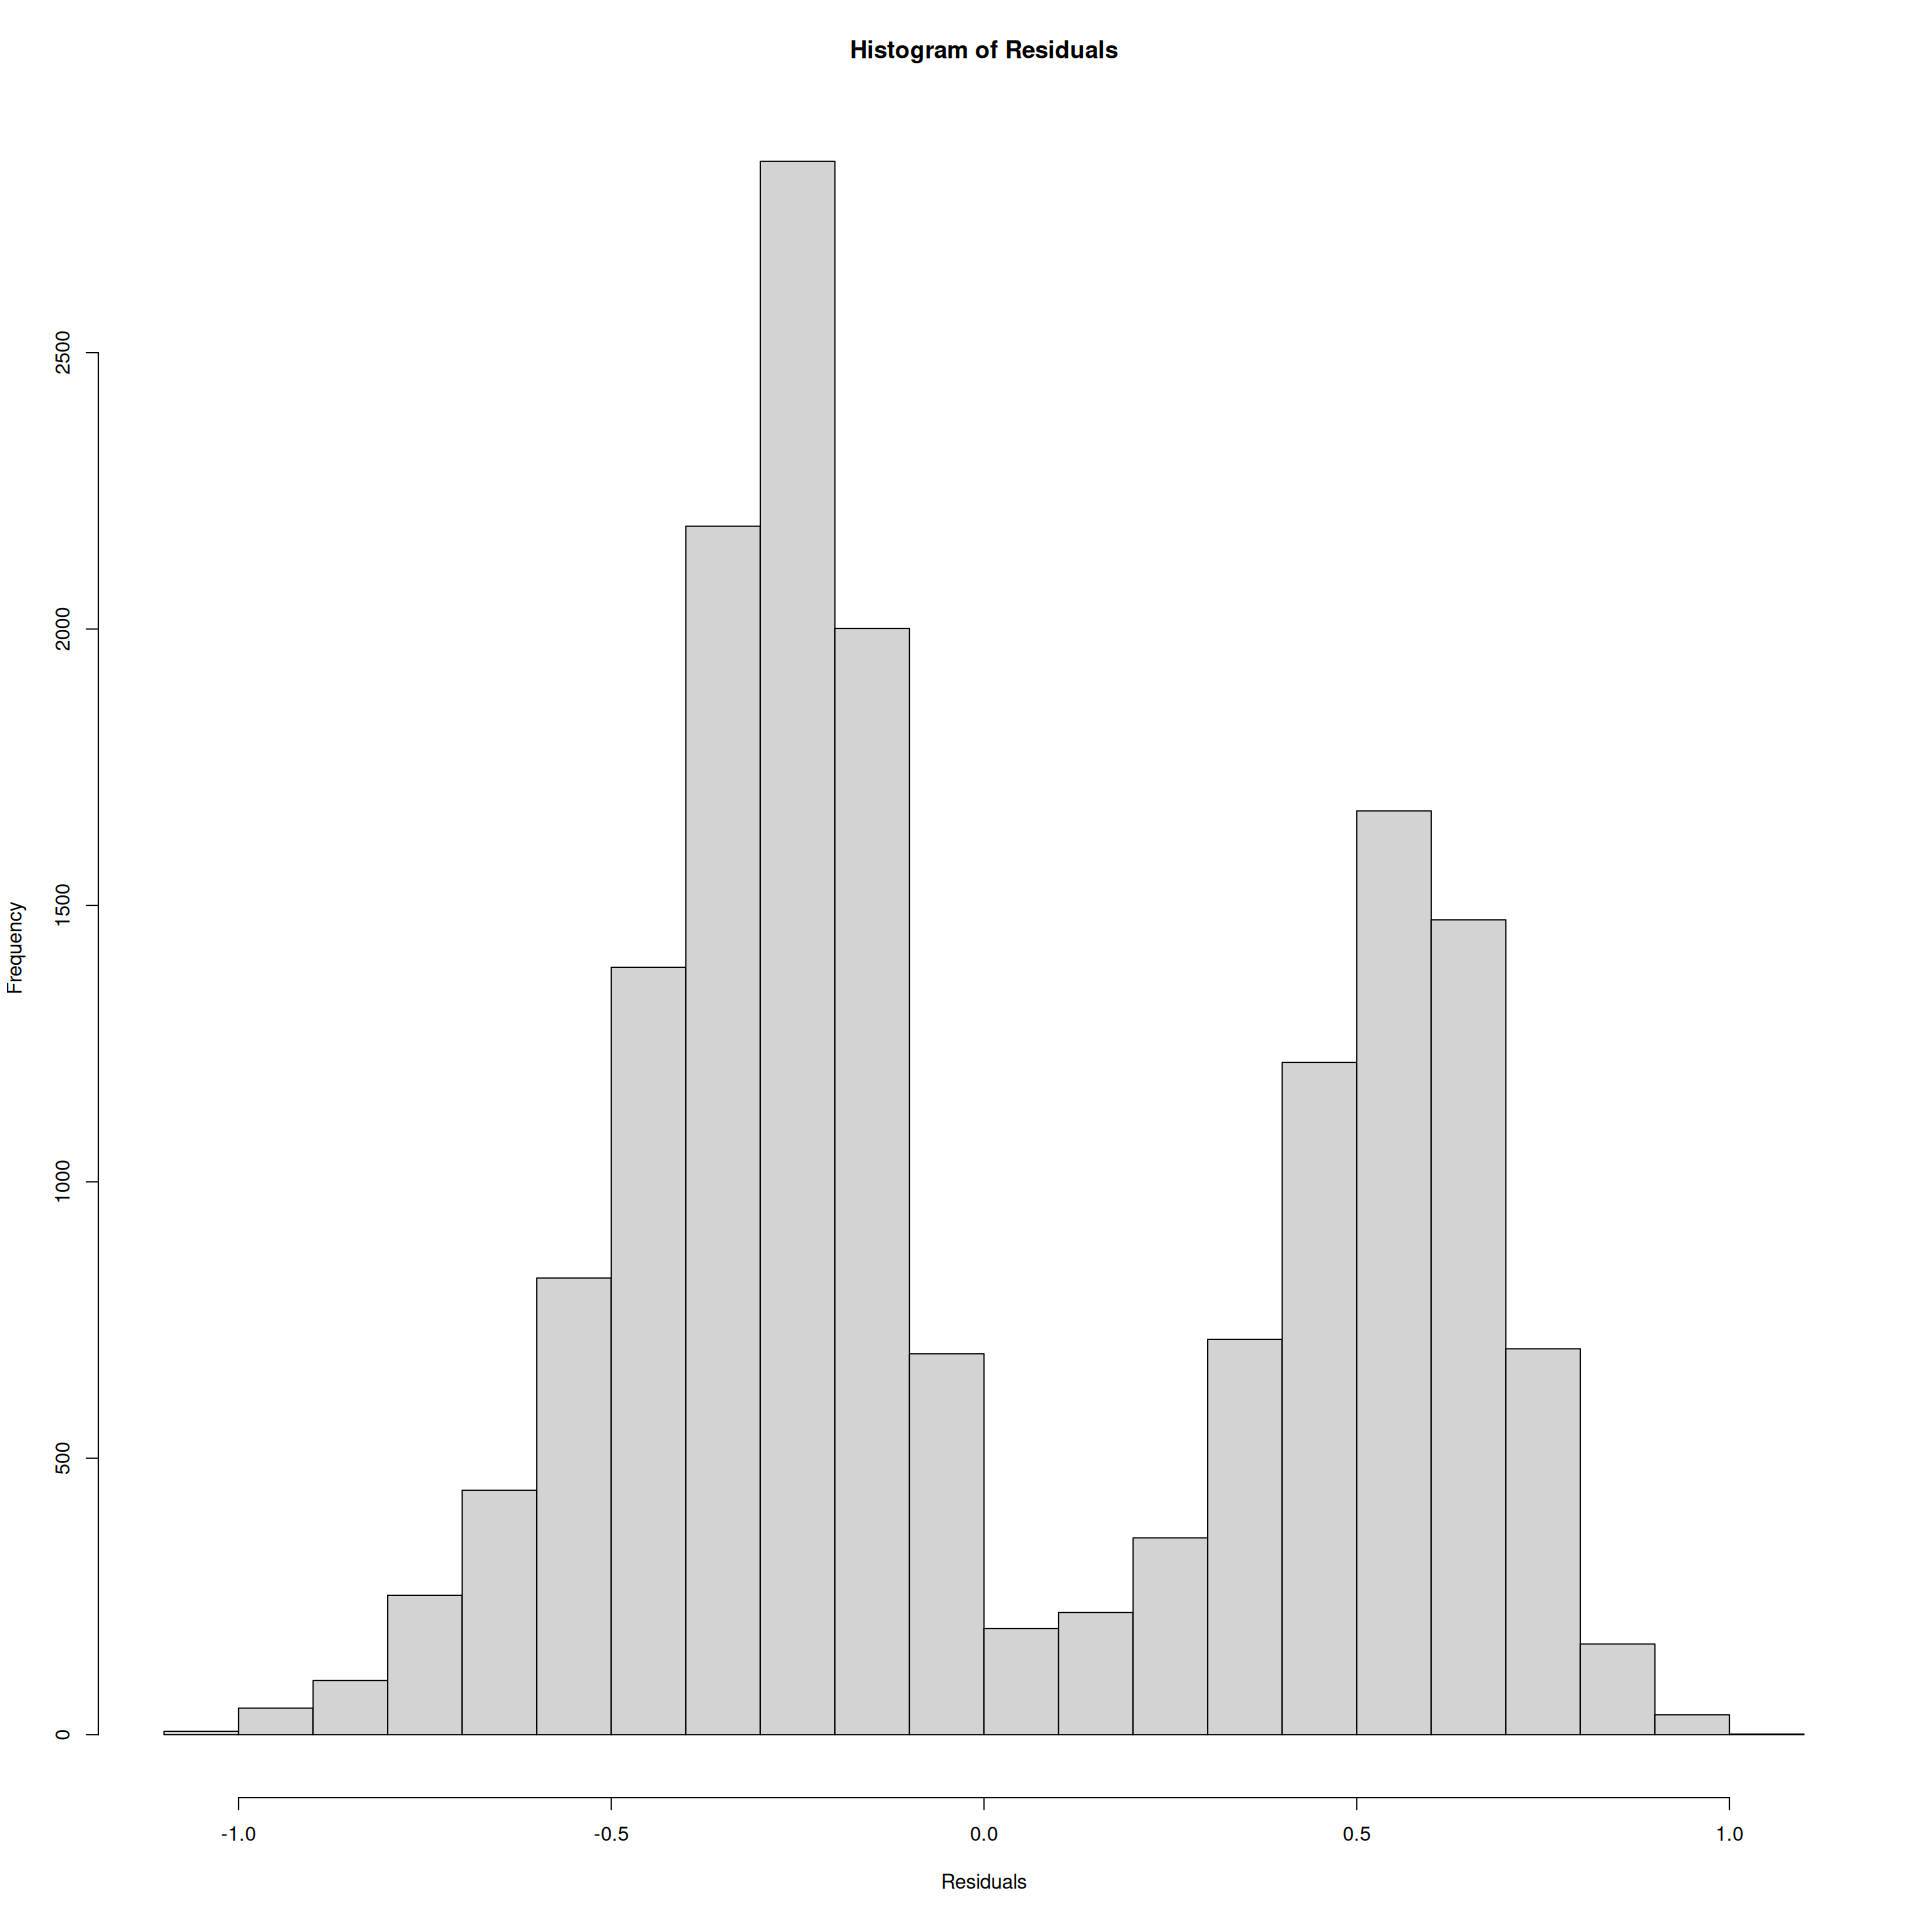

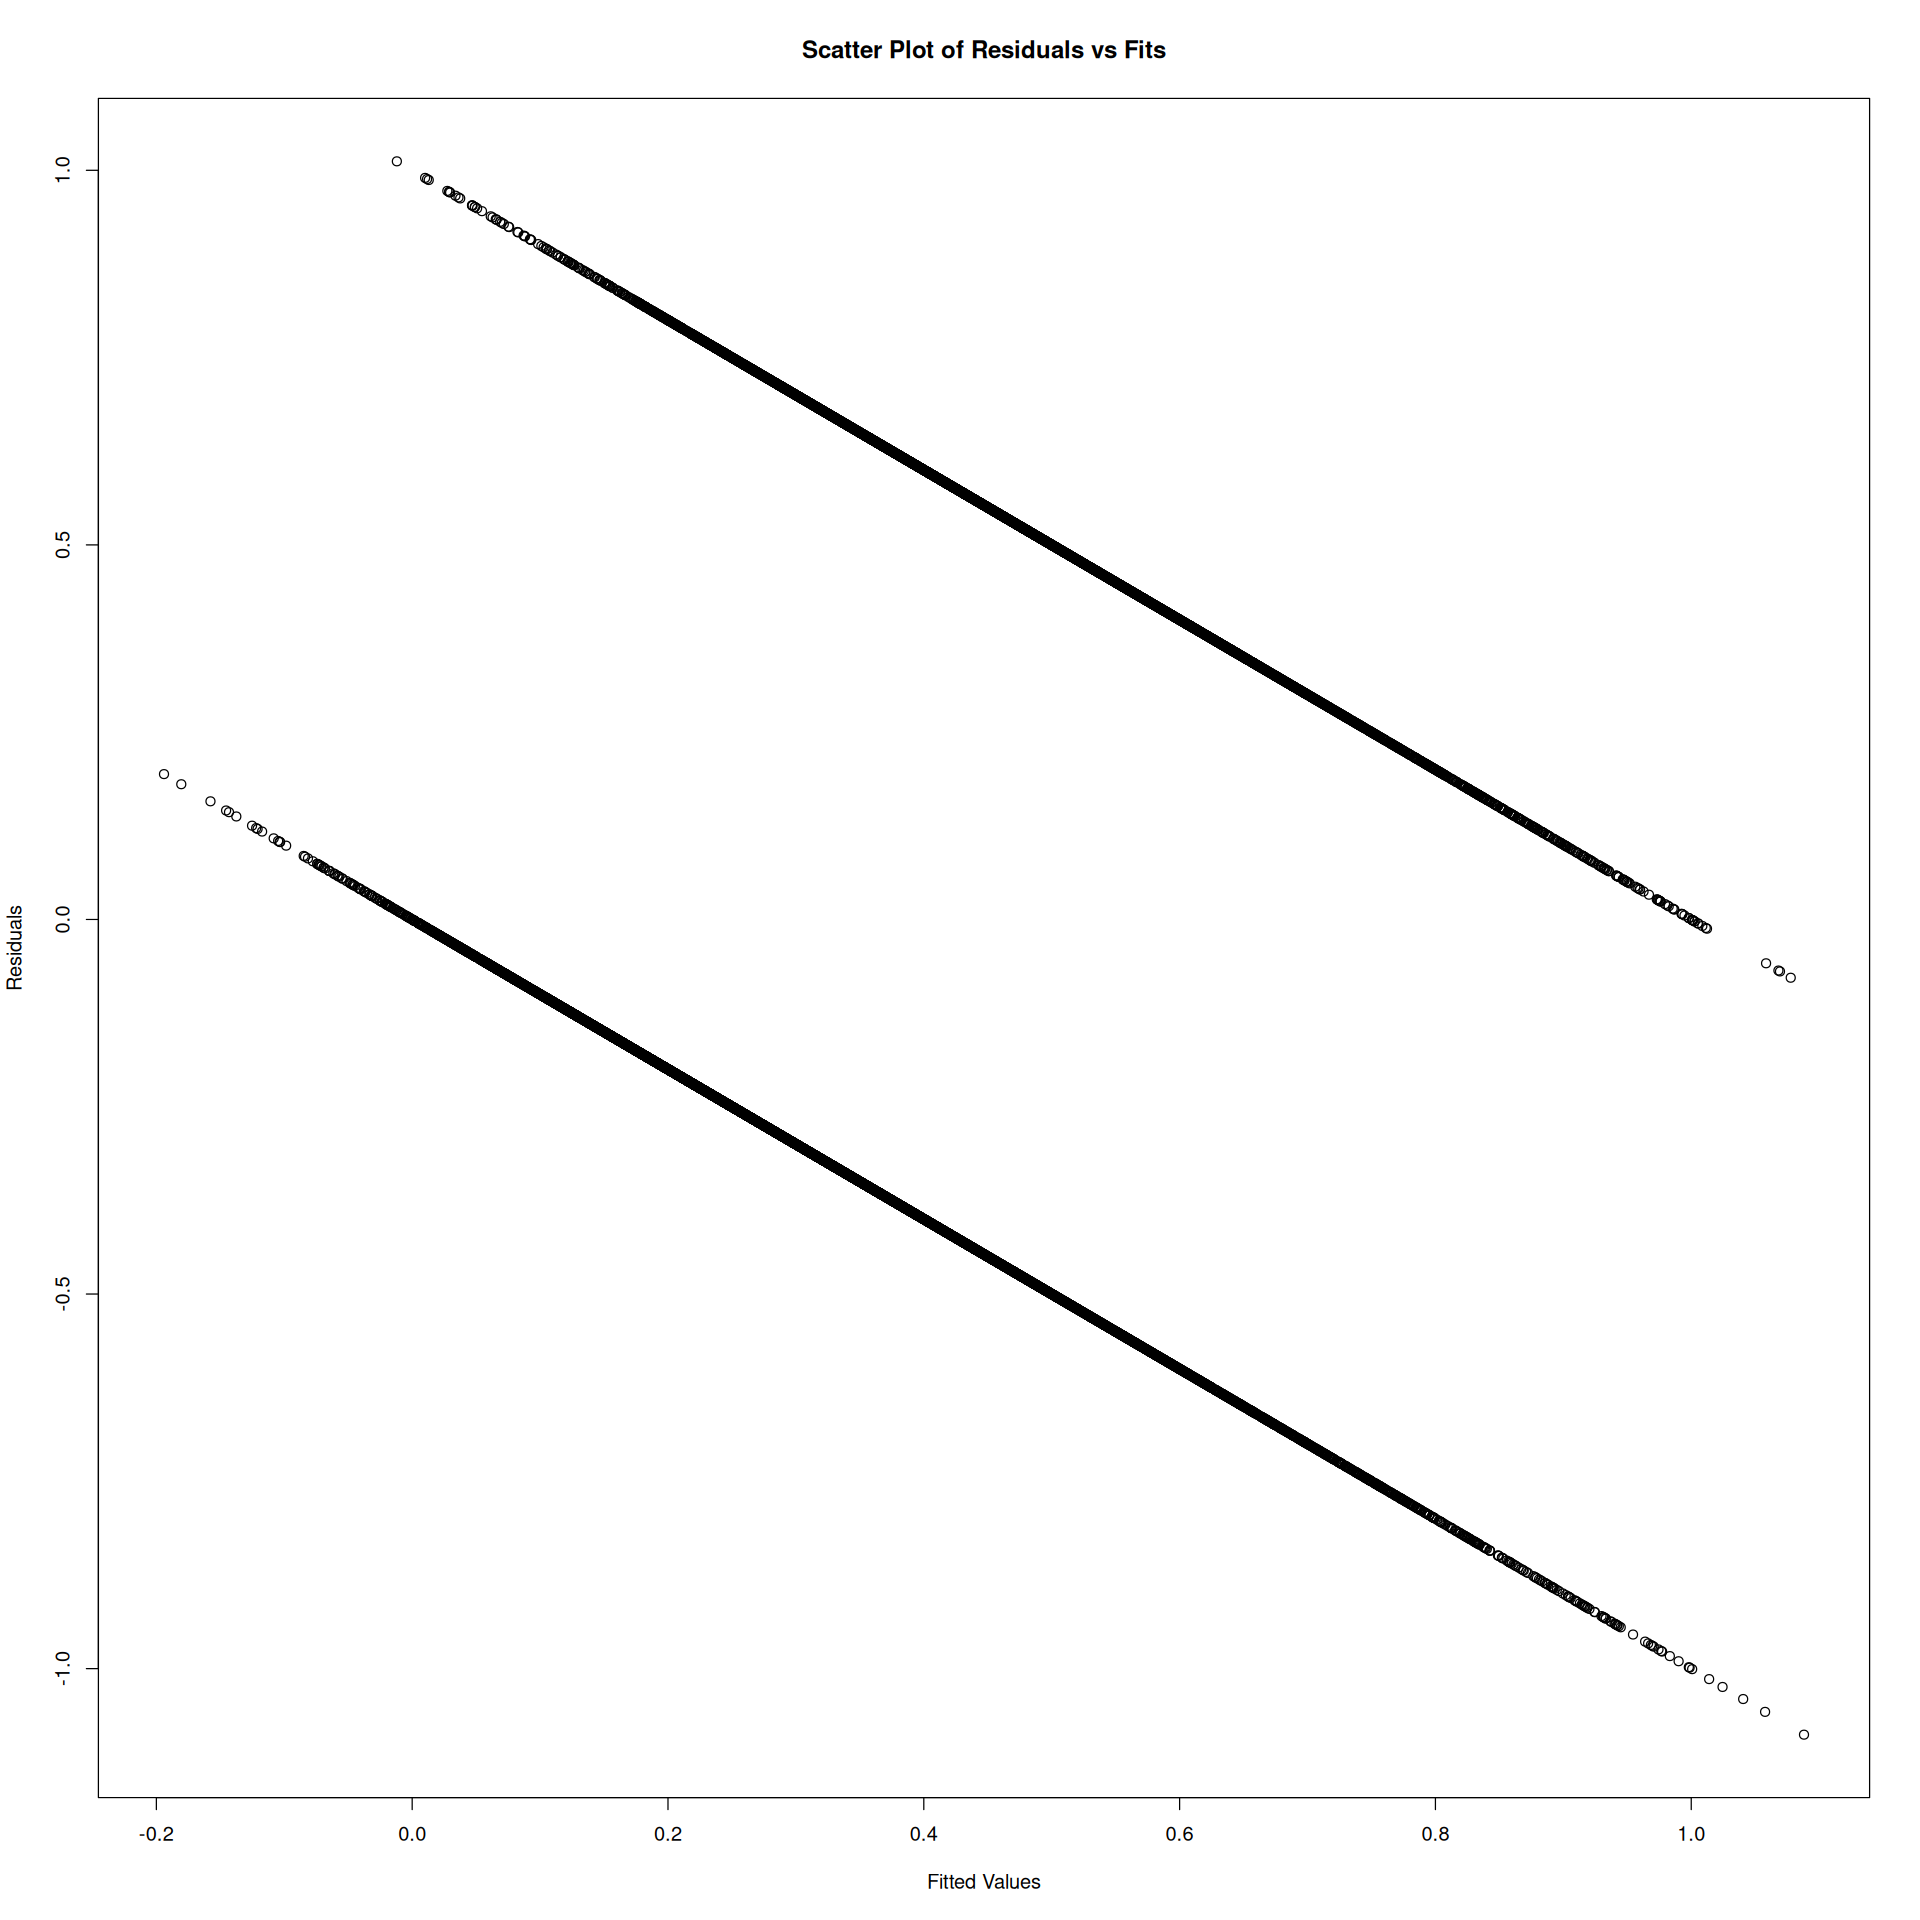

In [46]:
maraton_data$gender_numeric <- ifelse(maraton_data$gender == "M", 0, 1)

maraton_data <- na.omit(maraton_data)

# Calculate the lower and upper fences
stats <- boxplot.stats(maraton_data$seconds)
lower_fence <- stats$stats[1] - 1.5 * IQR(maraton_data$seconds)
upper_fence <- stats$stats[5] + 1.5 * IQR(maraton_data$seconds)

# Remove outliers
maraton_data <- maraton_data[maraton_data$seconds >= lower_fence & maraton_data$seconds <= upper_fence, ]


model <- lm(
    gender_numeric ~ age + seconds,
    data = maraton_data
)

residuals <- residuals(model)
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals")


summary(model)
# BEGIN: plot histogram of residuals
hist(residuals, main = "Histogram of Residuals", xlab = "Residuals")
# END: plot histogram of residuals

# Scatter plot of residuals versus fits
plot(
    fitted(model),
    residuals,
    main = "Scatter Plot of Residuals vs Fits", xlab = "Fitted Values", ylab = "Residuals"
)



#### Responder la pregunta de si me demoro corriendo x segundos, como me comparo con respecto a los demás.

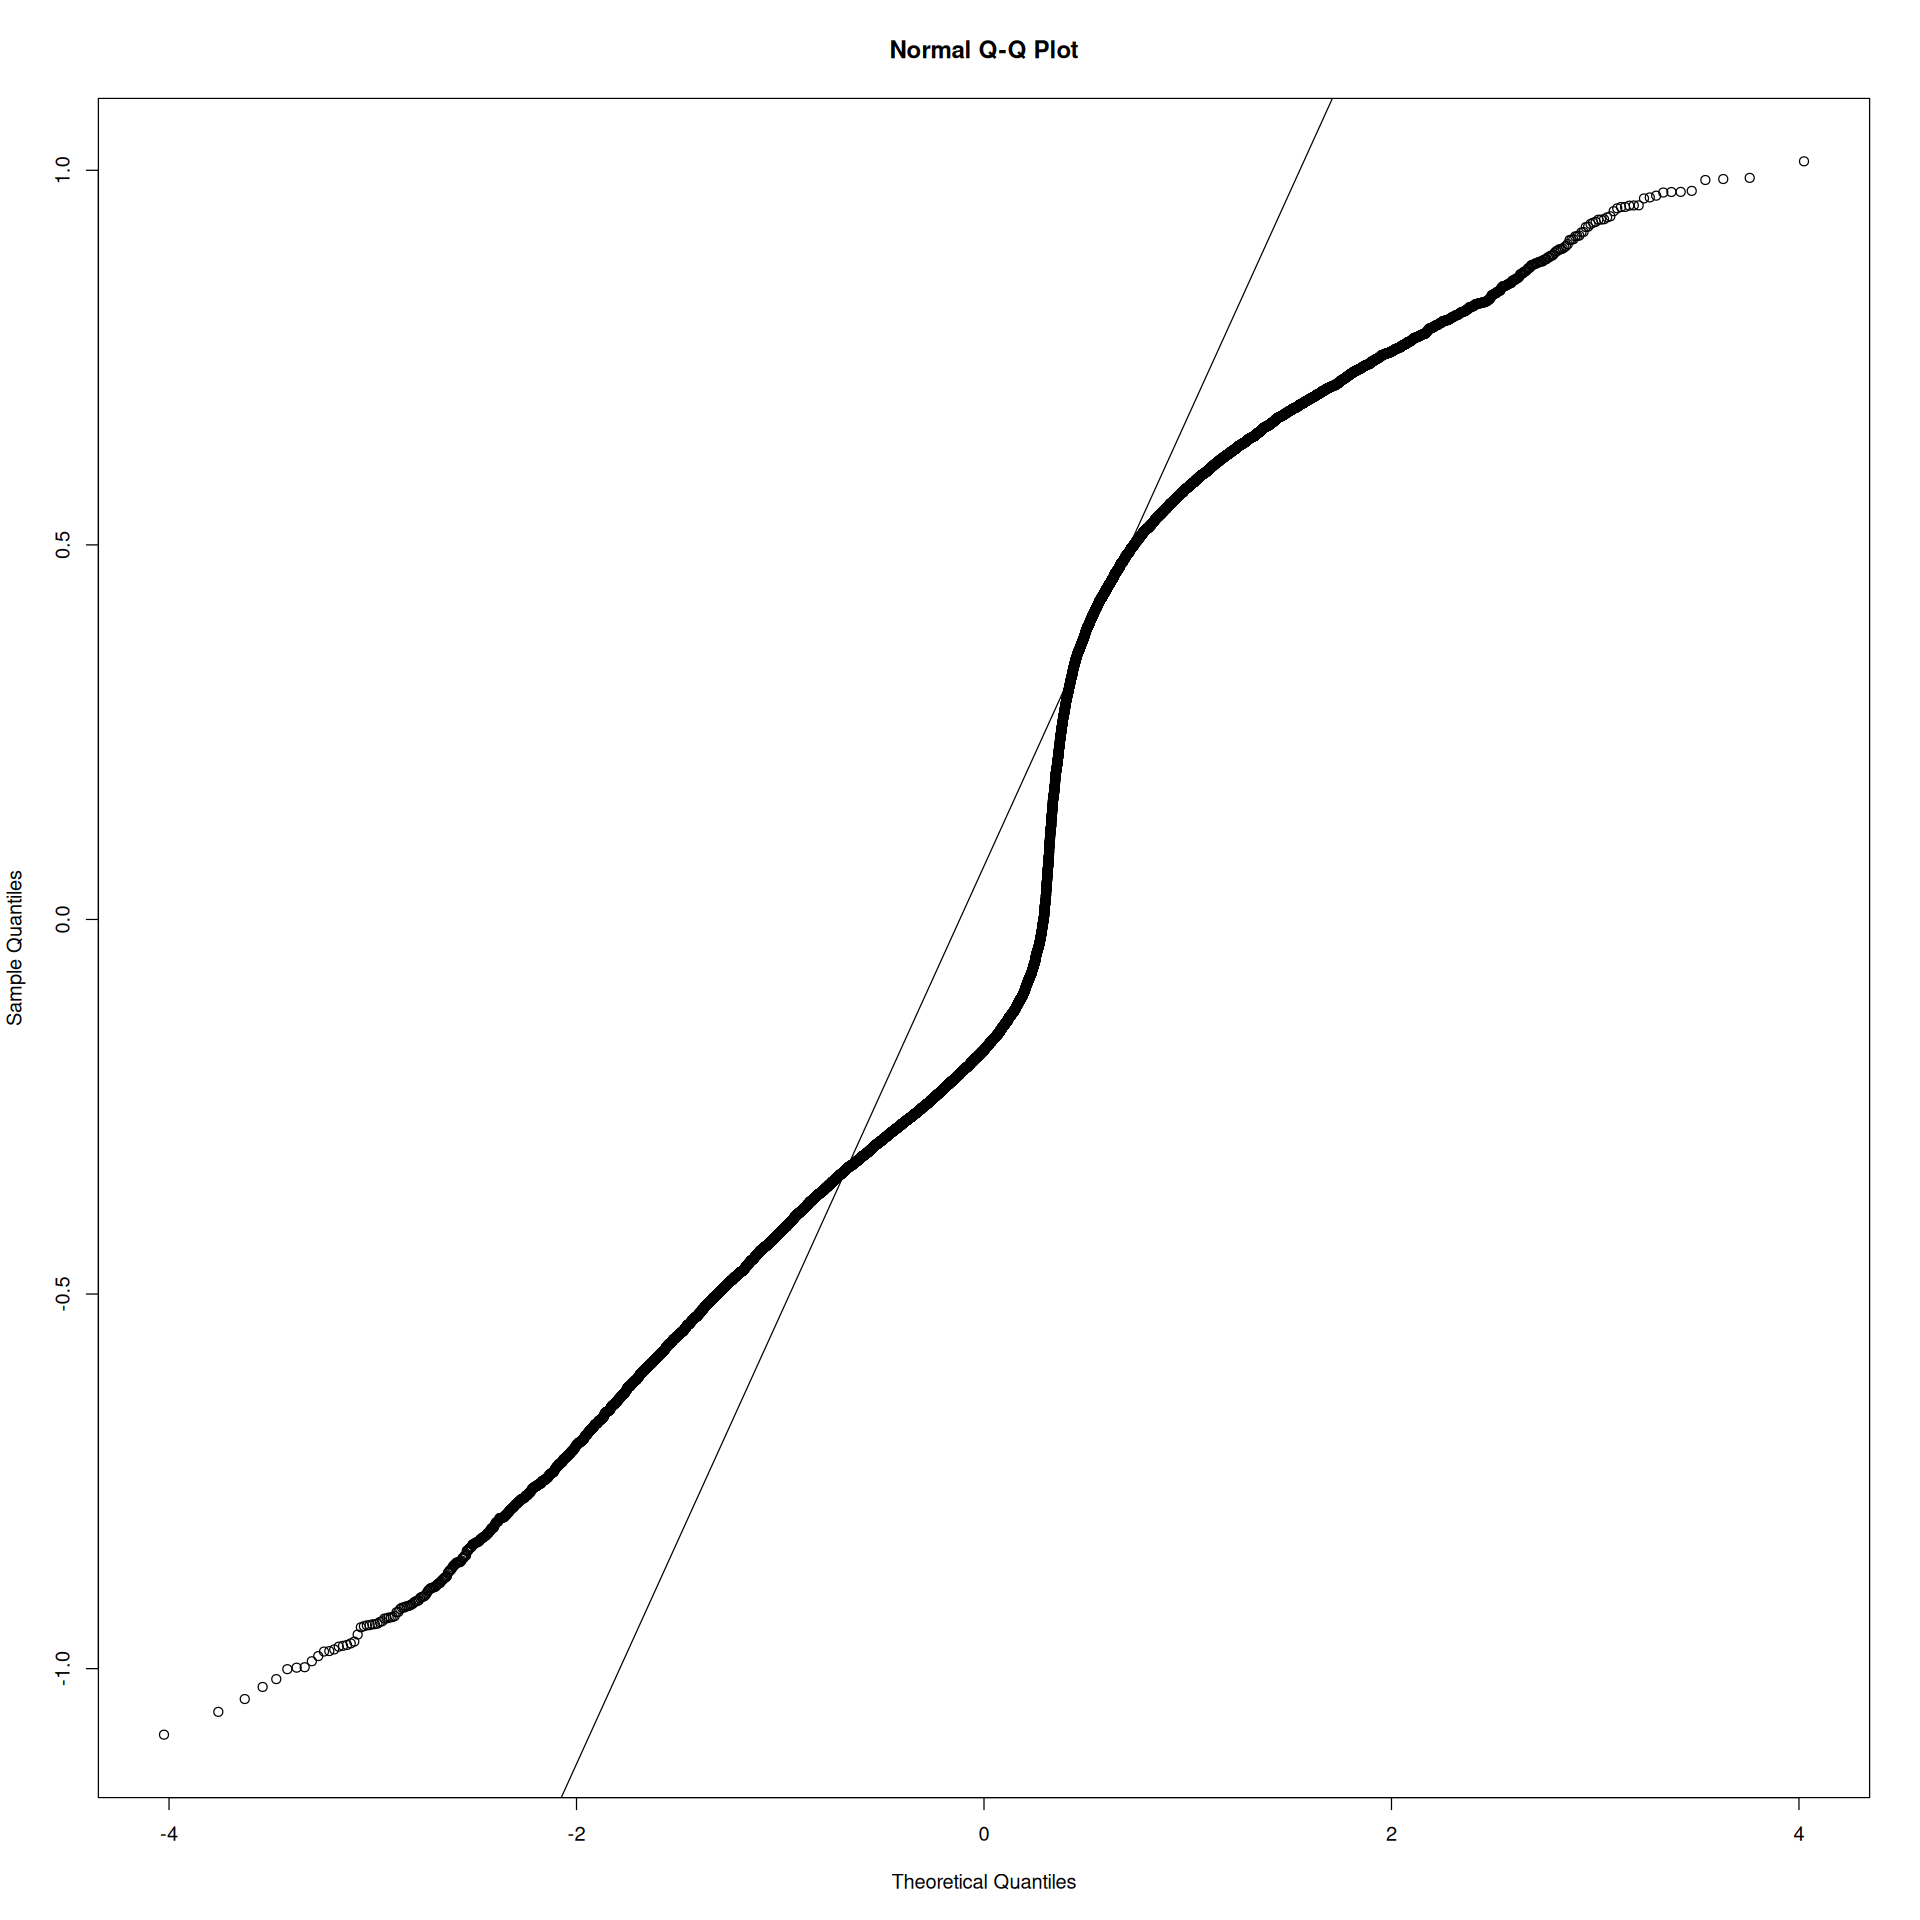

In [47]:
# Q-Q plot of residuals
qqnorm(residuals)
qqline(residuals)

In [48]:
mean_residuals <- mean(residuals)
mean_residuals

[1] -1.112848e-18

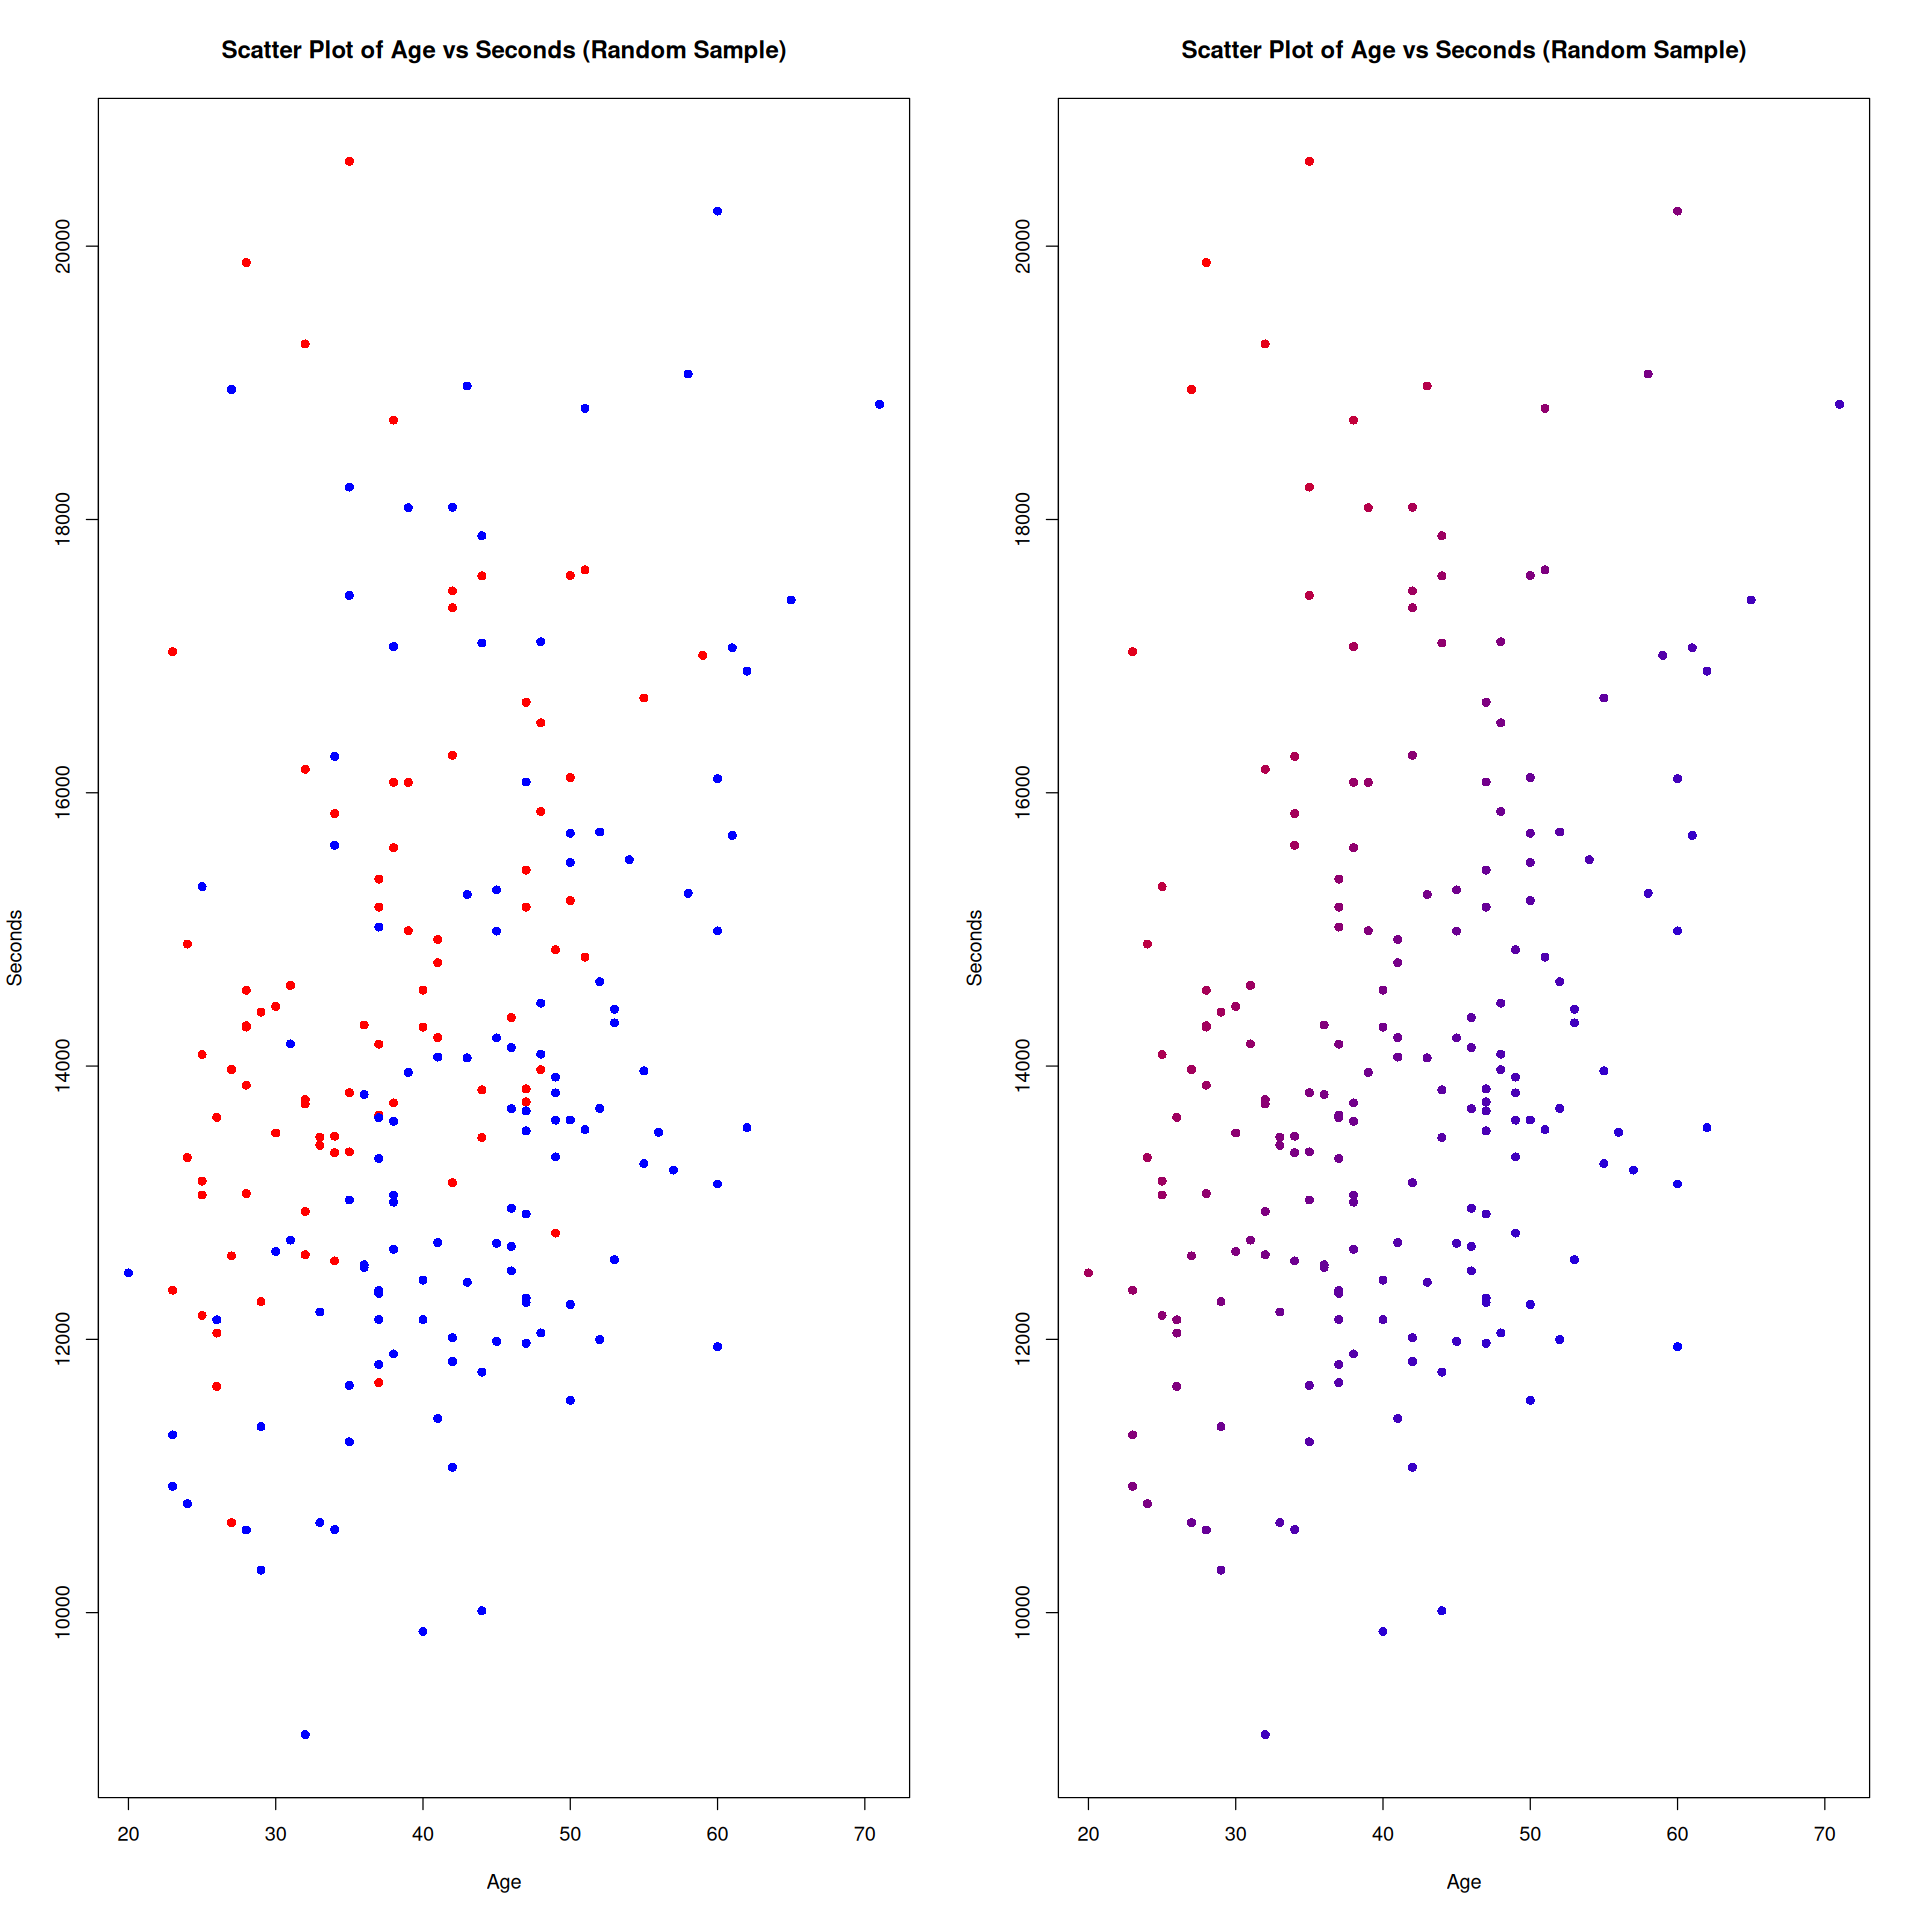

In [49]:
# Set the seed for reproducibility
set.seed(123)

# Get 100 random row indices
random_indices <- sample(nrow(maraton_data), 200)

# Get the corresponding random rows
random_rows <- maraton_data[random_indices, ]

# Perform prediction on the random rows
predictions <- predict(model, newdata = random_rows)

# Set the layout to 1 row and 2 columns
par(mfrow = c(1, 2))

# Plot 1: Scatter plot of age vs seconds with color differentiation by gender
plot(
    random_rows$age, 
    random_rows$seconds, 
    col = ifelse(random_rows$gender == "M", "blue", "red"),
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Scatter Plot of Age vs Seconds (Random Sample)",
    pch = 16
)

# Create a color gradient function
color_gradient_func <- colorRampPalette(c("blue", "red"))

# Normalize the predictions to be between 0 and 1
normalized_predictions <- 
    (predictions - min(predictions)) / (max(predictions) - min(predictions))

# Generate the colors for the plot
colors <- color_gradient_func(100)[floor(normalized_predictions * 99) + 1]

# Plot 2: Scatter plot of age vs seconds with color differentiation by predicted values
plot(
    random_rows$age, 
    random_rows$seconds, 
    col = colors,
    xlab = "Age", 
    ylab = "Seconds", 
    main = "Scatter Plot of Age vs Seconds (Random Sample)",
    pch = 16
)

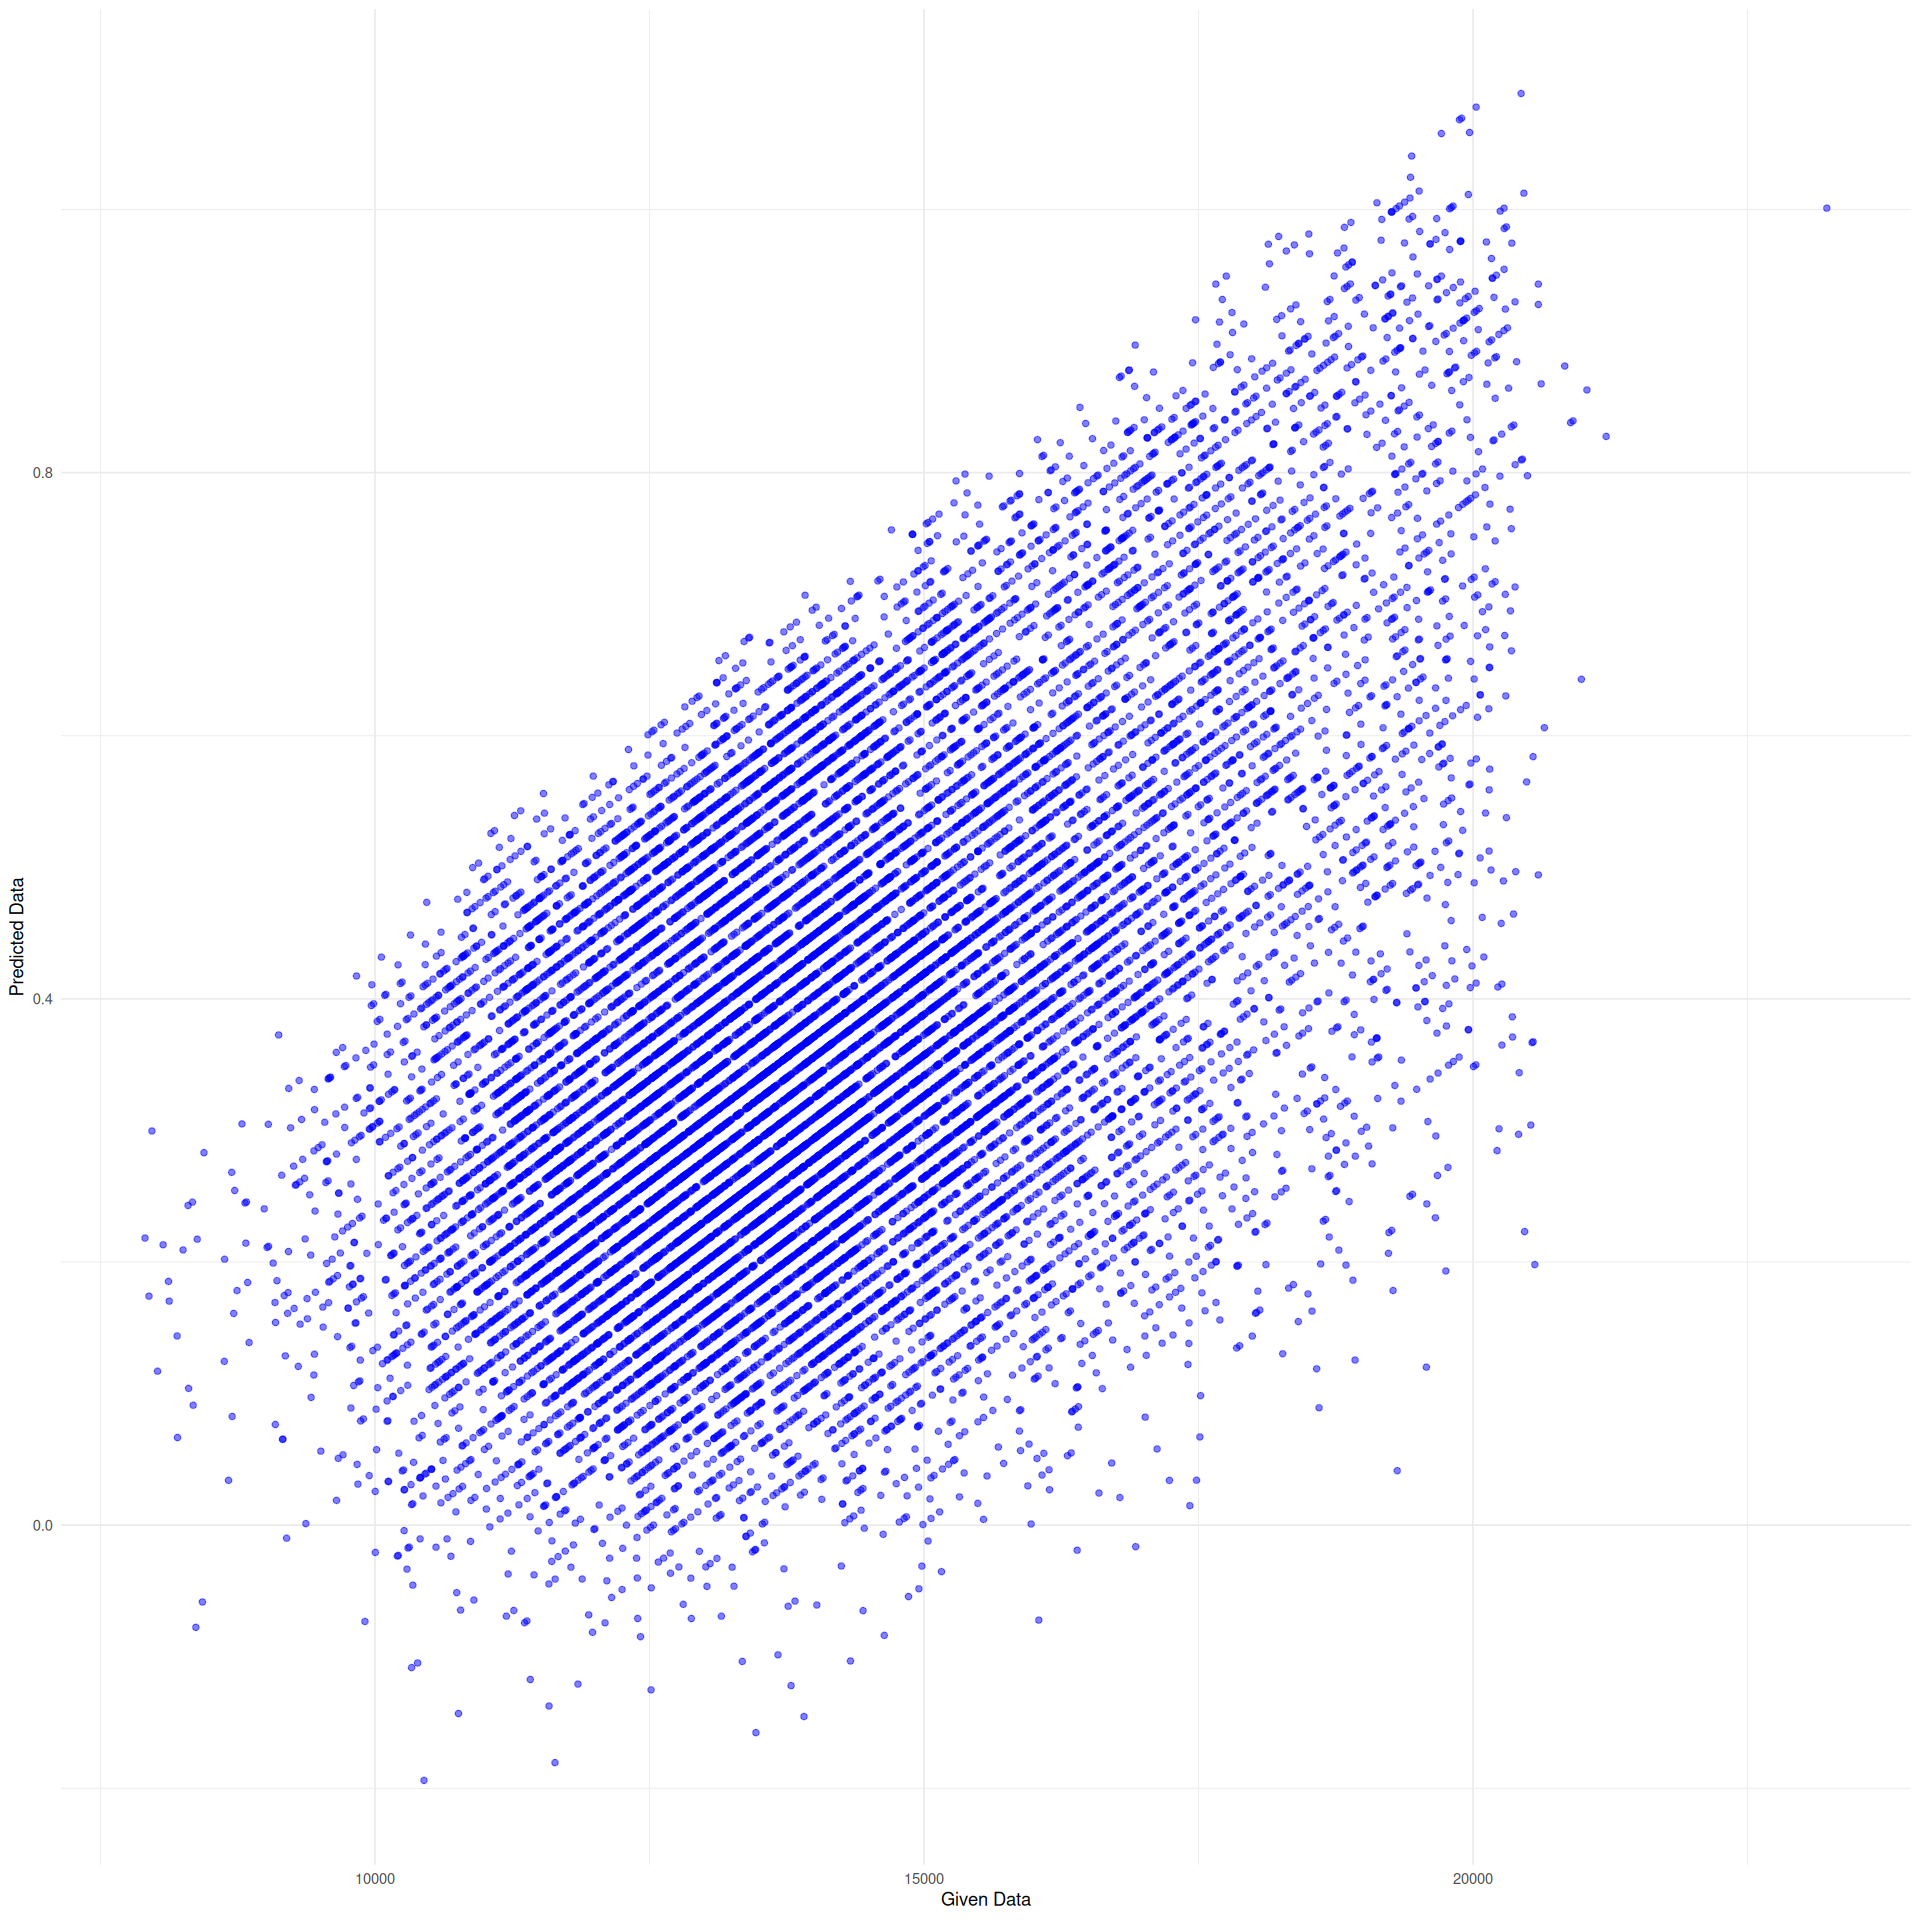

In [50]:
# Load necessary libraries
library(ggplot2) # Ensure ggplot2 is installed and loaded

# Generate predicted values using the model
predicted_values <- predict(model, newdata = maraton_data)
# Plot the predicted values vs the given data
ggplot(maraton_data, aes(x = seconds, y = predicted_values)) +
  geom_point(color = "blue", alpha = 0.5) +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  labs(x = "Given Data", y = "Predicted Data") +
  theme_minimal()

# if model is good, then should look like a diagonal line, ie y = x.


### Si me demoro x segundos corriendo como estoy con respecto a los demás :

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.70455 -0.41446 -0.12437 -0.07823  0.23494  0.59424 

[1] "The percentile of 17908.2981 is 92.7307999543535 %"


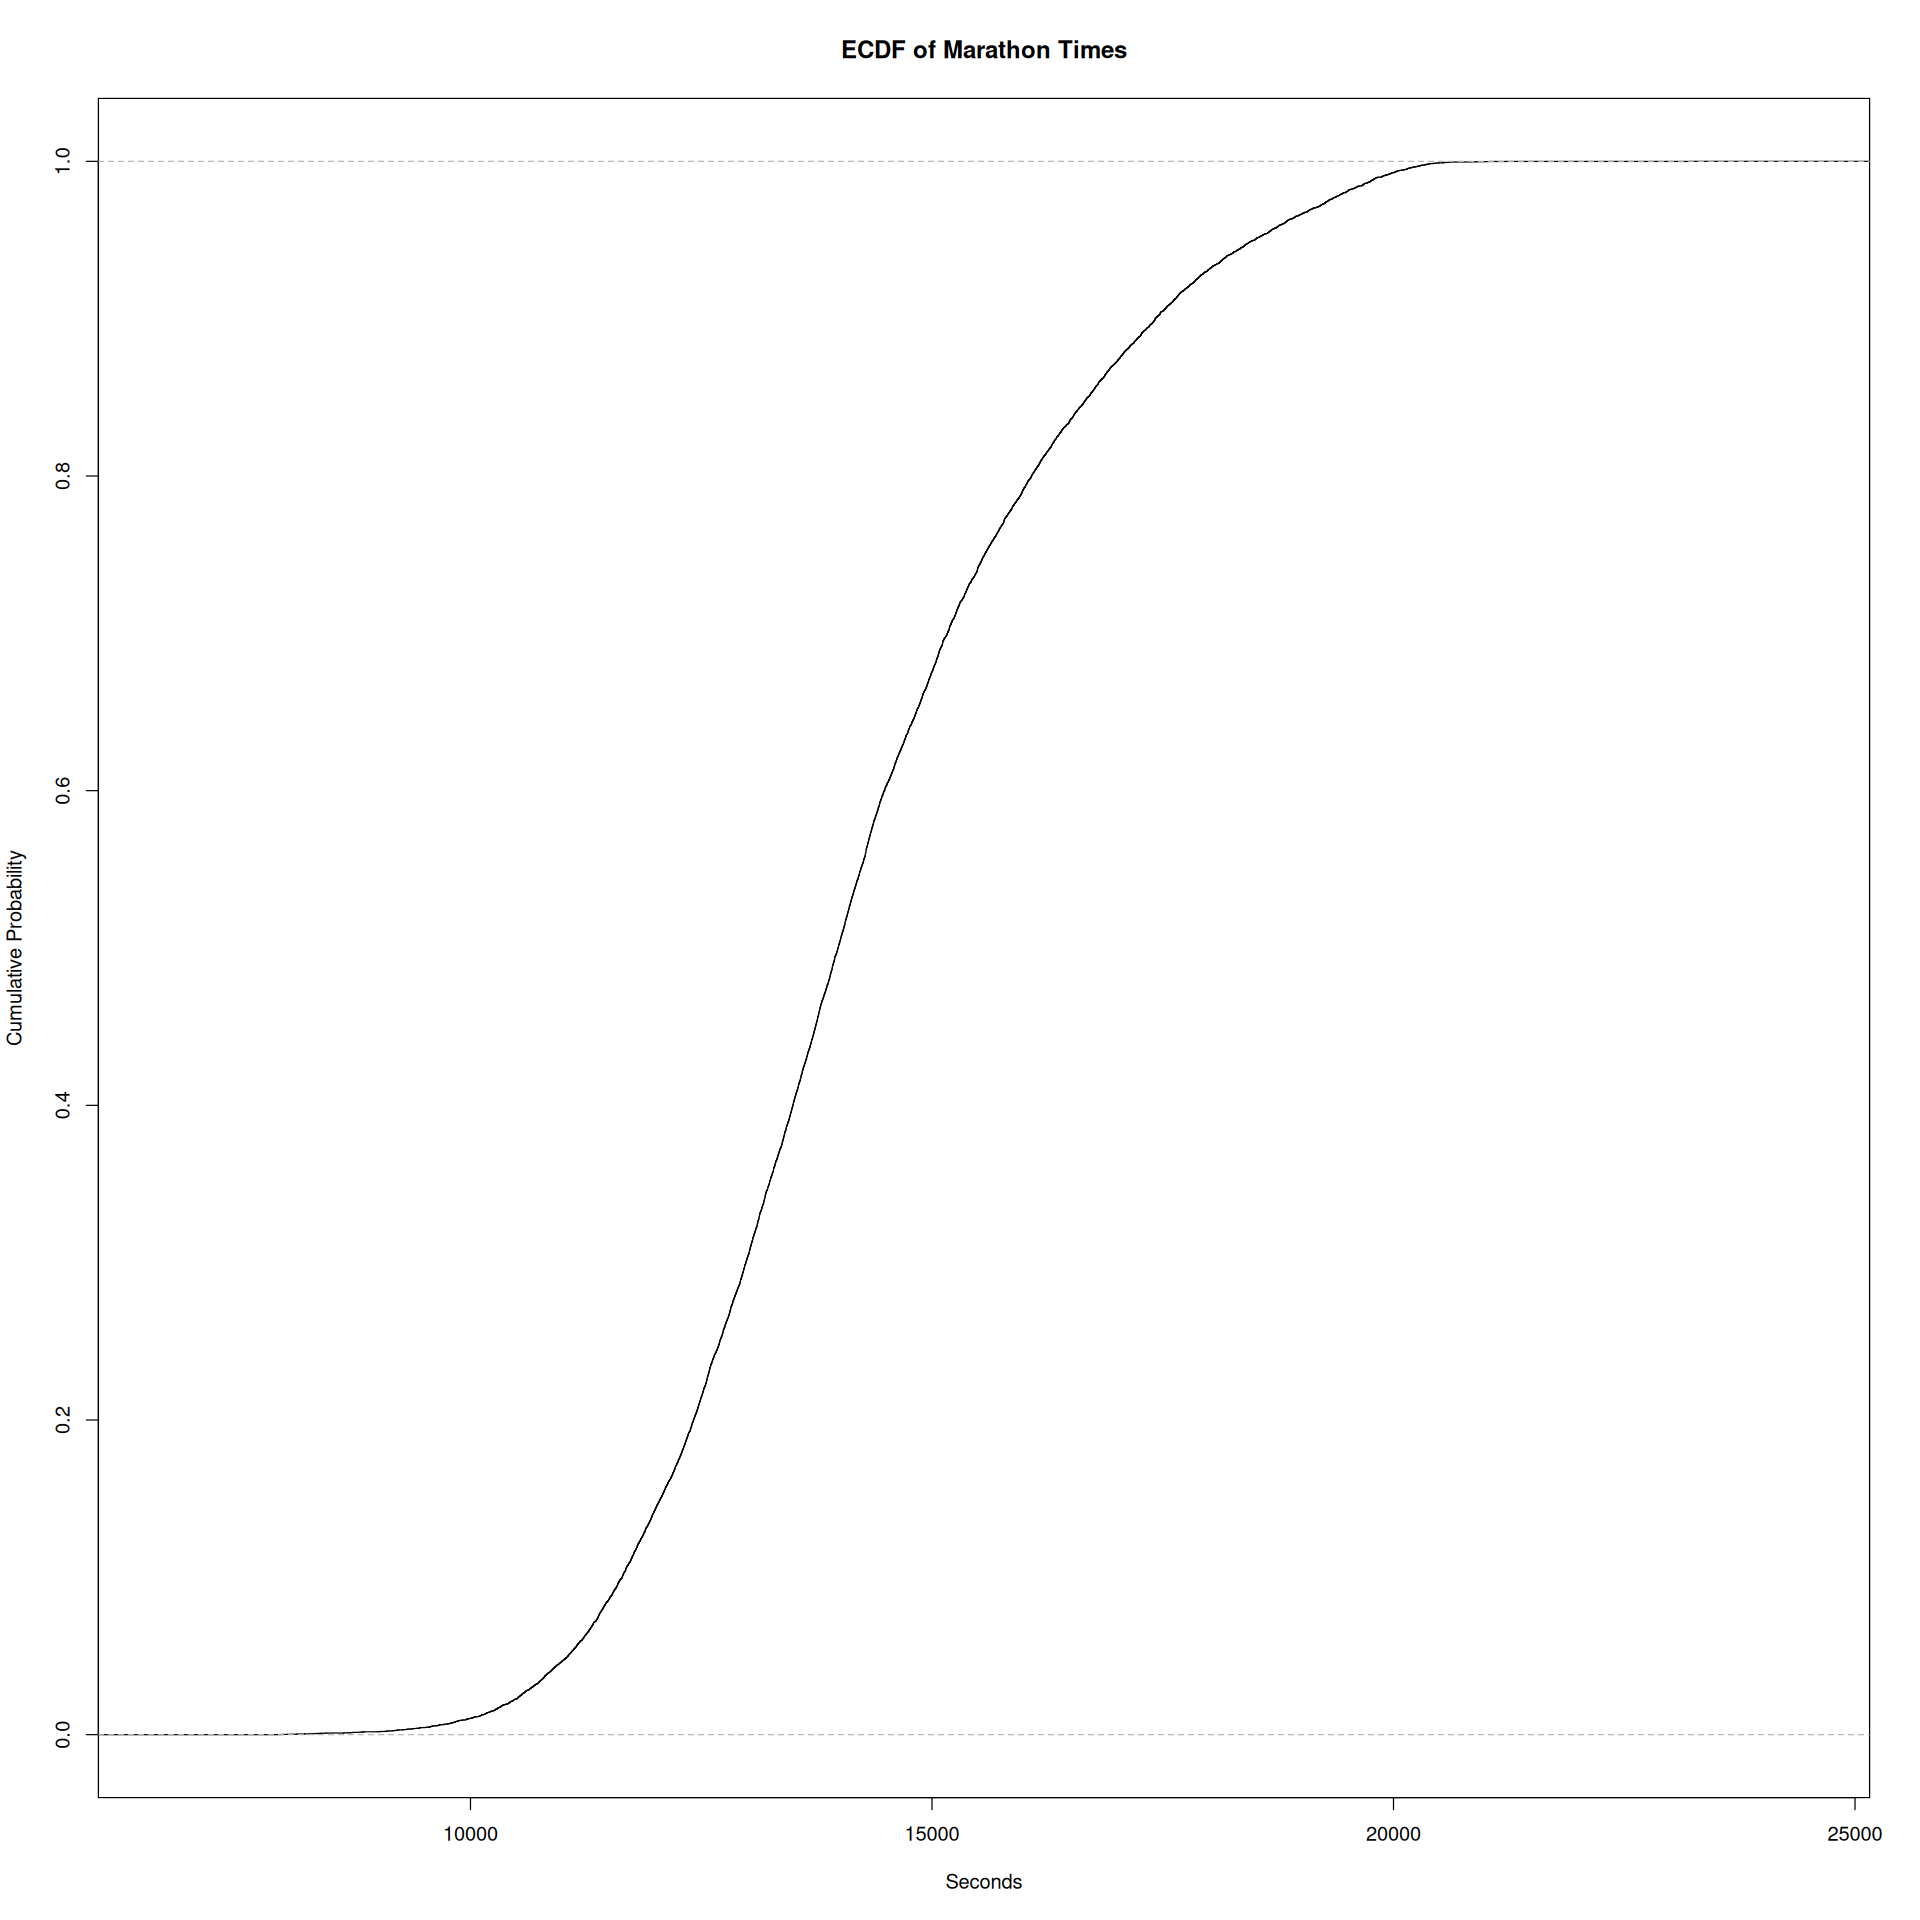

In [57]:
# Center the distribution at 0
centered_seconds <- maraton_data$seconds - mean(maraton_data$seconds)

# Divide by the standard deviation
standardized_seconds <- centered_seconds / sd(maraton_data$seconds)


# Calculate percentiles
percentiles <- quantile(standardized_seconds, probs = c(0.25, 0.5, 0.75))
summary(percentiles)
# Print the percentiles

# Calculate the empirical cumulative distribution function (ECDF)
# Plot the empirical cumulative distribution function (ECDF)
ecdf_seconds <- ecdf(maraton_data$seconds)
plot(ecdf_seconds, main = "ECDF of Marathon Times", xlab = "Seconds", ylab = "Cumulative Probability")

# Calculate the percentile of a given value
given_value <- 17908.2981  # Replace with the desired value
percentile <- ecdf_seconds(given_value) * 100

# Print the percentile
print(paste("The percentile of", given_value, "is", percentile, "%"))